# **Translation of DEGs to orthologous subfamilies of barley & wheat**

### **Content:**
#### 1. gene-wise comparism of barley/wheat sets with refgenes for each cutoff-type -> 2x-species 9-11+1 sets in 3x-cutoffs
#### 2. DEGs translation to subfamilies and their intersection across all types with 3x-cutoff
#### 3. UpsetR intersection of 4-selected contrasts with 0.01 cutoff in subfamily-level

In [256]:
library(tidyverse)
library(UpSetR)
library(RVenn)
set.seed(42)

In [257]:
# import tables
# barley
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
# deg tables of 0.1
b1_1 <- read.table("deg1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b1_1 <- b1_1 %>% select (target_id) %>% rename (gene = target_id)
b2_1 <- read.table("deg2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b2_1 <- b2_1 %>% select (target_id) %>% rename (gene = target_id)
b30_1 <- read.table("deg30_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b30_1 <- b30_1 %>% select (target_id) %>% rename (gene = target_id)
b3_1 <- read.table("deg3_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b3_1 <- b3_1 %>% select (target_id) %>% rename (gene = target_id)
b4_1 <- read.table("deg4_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b4_1 <- b4_1 %>% select (target_id) %>% rename (gene = target_id)
b5_1 <- read.table("deg5_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b5_1 <- b5_1 %>% select (target_id) %>% rename (gene = target_id)
b6_1 <- read.table("deg6_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b6_1 <- b6_1 %>% select (target_id) %>% rename (gene = target_id)
b7_1 <- read.table("deg7_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b7_1 <- b7_1 %>% select (target_id) %>% rename (gene = target_id)
b8_1 <- read.table("deg8_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b8_1 <- b8_1 %>% select (target_id) %>% rename (gene = target_id)
b9_1 <- read.table("deg9_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b9_1 <- b9_1 %>% select (target_id) %>% rename (gene = target_id)

# deg tables of 0.05
b1_05 <- read.table("deg1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b1_05 <- b1_05 %>% select (target_id) %>% rename (gene = target_id)
b2_05 <- read.table("deg2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b2_05 <- b2_05 %>% select (target_id) %>% rename (gene = target_id)
b30_05 <- read.table("deg30_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b30_05 <- b30_05 %>% select (target_id) %>% rename (gene = target_id)
b3_05 <- read.table("deg3_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b3_05 <- b3_05 %>% select (target_id) %>% rename (gene = target_id)
b4_05 <- read.table("deg4_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b4_05 <- b4_05 %>% select (target_id) %>% rename (gene = target_id)
b5_05 <- read.table("deg5_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b5_05 <- b5_05 %>% select (target_id) %>% rename (gene = target_id)
b6_05 <- read.table("deg6_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b6_05 <- b6_05 %>% select (target_id) %>% rename (gene = target_id)
b7_05 <- read.table("deg7_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b7_05 <- b7_05 %>% select (target_id) %>% rename (gene = target_id)
b8_05 <- read.table("deg8_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b8_05 <- b8_05 %>% select (target_id) %>% rename (gene = target_id)
b9_05 <- read.table("deg9_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b9_05 <- b9_05 %>% select (target_id) %>% rename (gene = target_id)

# deg tables of 0.01
b1_01 <- read.table("deg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b1_01 <- b1_01 %>% select (target_id) %>% rename (gene = target_id)
b2_01 <- read.table("deg2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b2_01 <- b2_01 %>% select (target_id) %>% rename (gene = target_id)
b30_01 <- read.table("deg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b30_01 <- b30_01 %>% select (target_id) %>% rename (gene = target_id)
b3_01 <- read.table("deg3_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b3_01 <- b3_01 %>% select (target_id) %>% rename (gene = target_id)
b4_01 <- read.table("deg4_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b4_01 <- b4_01 %>% select (target_id) %>% rename (gene = target_id)
b5_01 <- read.table("deg5_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b5_01 <- b5_01 %>% select (target_id) %>% rename (gene = target_id)
b6_01 <- read.table("deg6_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b6_01 <- b6_01 %>% select (target_id) %>% rename (gene = target_id)
b7_01 <- read.table("deg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b7_01 <- b7_01 %>% select (target_id) %>% rename (gene = target_id)
b8_01 <- read.table("deg8_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b8_01 <- b8_01 %>% select (target_id) %>% rename (gene = target_id)
b9_01 <- read.table("deg9_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
b9_01 <- b9_01 %>% select (target_id) %>% rename (gene = target_id)

# wheat
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
# deg tables of 0.1
w1_1 <- read.table("wdeg1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w1_1 <- w1_1 %>% select (target_id) %>% rename (gene = target_id)
w2_1 <- read.table("wdeg2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w2_1 <- w2_1 %>% select (target_id) %>% rename (gene = target_id)
w30_1 <- read.table("wdeg30_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w30_1 <- w30_1 %>% select (target_id) %>% rename (gene = target_id)
w3_1 <- read.table("wdeg3_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w3_1 <- w3_1 %>% select (target_id) %>% rename (gene = target_id)
w4_1 <- read.table("wdeg4_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w4_1 <- w4_1 %>% select (target_id) %>% rename (gene = target_id)
w5_1 <- read.table("wdeg5_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w5_1 <- w5_1 %>% select (target_id) %>% rename (gene = target_id)
w6_1 <- read.table("wdeg6_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w6_1 <- w6_1 %>% select (target_id) %>% rename (gene = target_id)
w7_1 <- read.table("wdeg7_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w7_1 <- w7_1 %>% select (target_id) %>% rename (gene = target_id)
w8_1 <- read.table("wdeg8_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w8_1 <- w8_1 %>% select (target_id) %>% rename (gene = target_id)
w9_1 <- read.table("wdeg9_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w9_1 <- w9_1 %>% select (target_id) %>% rename (gene = target_id)
w10_1 <- read.table("wdeg10_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w10_1 <- w10_1 %>% select (target_id) %>% rename (gene = target_id)
w11_1 <- read.table("wdeg11_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w11_1 <- w11_1 %>% select (target_id) %>% rename (gene = target_id)

# deg tables of 0.05
w1_05 <- read.table("wdeg1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w1_05 <- w1_05 %>% select (target_id) %>% rename (gene = target_id)
w2_05 <- read.table("wdeg2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w2_05 <- w2_05 %>% select (target_id) %>% rename (gene = target_id)
w30_05 <- read.table("wdeg30_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w30_05 <- w30_05 %>% select (target_id) %>% rename (gene = target_id)
w3_05 <- read.table("wdeg3_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w3_05 <- w3_05 %>% select (target_id) %>% rename (gene = target_id)
w4_05 <- read.table("wdeg4_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w4_05 <- w4_05 %>% select (target_id) %>% rename (gene = target_id)
w5_05 <- read.table("wdeg5_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w5_05 <- w5_05 %>% select (target_id) %>% rename (gene = target_id)
w6_05 <- read.table("wdeg6_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w6_05 <- w6_05 %>% select (target_id) %>% rename (gene = target_id)
w7_05 <- read.table("wdeg7_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w7_05 <- w7_05 %>% select (target_id) %>% rename (gene = target_id)
w8_05 <- read.table("wdeg8_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w8_05 <- w8_05 %>% select (target_id) %>% rename (gene = target_id)
w9_05 <- read.table("wdeg9_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w9_05 <- w9_05 %>% select (target_id) %>% rename (gene = target_id)
w10_05 <- read.table("wdeg10_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w10_05 <- w10_05 %>% select (target_id) %>% rename (gene = target_id)
w11_05 <- read.table("wdeg11_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w11_05 <- w11_05 %>% select (target_id) %>% rename (gene = target_id)

# deg tables of 0.01
w1_01 <- read.table("wdeg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w1_01 <- w1_01 %>% select (target_id) %>% rename (gene = target_id)
w2_01 <- read.table("wdeg2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w2_01 <- w2_01 %>% select (target_id) %>% rename (gene = target_id)
w30_01 <- read.table("wdeg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w30_01 <- w30_01 %>% select (target_id) %>% rename (gene = target_id)
w3_01 <- read.table("wdeg3_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w3_01 <- w3_01 %>% select (target_id) %>% rename (gene = target_id)
w4_01 <- read.table("wdeg4_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w4_01 <- w4_01 %>% select (target_id) %>% rename (gene = target_id)
w5_01 <- read.table("wdeg5_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w5_01 <- w5_01 %>% select (target_id) %>% rename (gene = target_id)
w6_01 <- read.table("wdeg6_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w6_01 <- w6_01 %>% select (target_id) %>% rename (gene = target_id)
w7_01 <- read.table("wdeg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w7_01 <- w7_01 %>% select (target_id) %>% rename (gene = target_id)
w8_01 <- read.table("wdeg8_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w8_01 <- w8_01 %>% select (target_id) %>% rename (gene = target_id)
w9_01 <- read.table("wdeg9_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w9_01 <- w9_01 %>% select (target_id) %>% rename (gene = target_id)
w10_01 <- read.table("wdeg10_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w10_01 <- w10_01 %>% select (target_id) %>% rename (gene = target_id)
w11_01 <- read.table("wdeg11_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
w11_01 <- w11_01 %>% select (target_id) %>% rename (gene = target_id)

In [303]:
# import refgenes table
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refgenes/translation2current_versions/")
ref <- read.table("two_times_filtered.subfamilies.tsv", header = TRUE, sep = "\t", stringsAsFactors = FALSE)
glimpse(ref)
ref_c <- ref %>% distinct(subfamily)
glimpse(ref_c)
ref_d <- ref %>% distinct(display_id)
glimpse(ref_d)

# triticeae orthologous subfamilies table summarized by Daniel, use it to intersect DEGs with geneid-s, make it as a subset for barley & wheat only
# using bash: cat gene_families.tsv | grep -E 'MOREX|aestivum'
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/phylogenomics/")
fam <- read.table("gene_families.tsv", header = TRUE, sep = "\t", stringsAsFactors = FALSE)
glimpse(fam)
fam_bw <- fam %>% filter(taxon == "Hordeum_vulgare_MOREX" | taxon == "Triticum_aestivum_A" | taxon == "Triticum_aestivum_B" | taxon == "Triticum_aestivum_D" | taxon == "Triticum_aestivum_Un")
glimpse(fam_bw)
fam_bw_subfam_all <- fam_bw
fam_bw_subfam <- fam_bw$subfamily
glimpse(fam_bw_subfam)

# refgenes table translation into subfam 
r <- inner_join(ref_c, fam_bw, by = "subfamily")
r <- r$subfamily
glimpse(r)

cr <- ref_c$subfamily
glimpse(cr)

fam_wA <- fam_bw %>% filter(taxon == "Triticum_aestivum_A")
fam_wB <- fam_bw %>% filter(taxon == "Triticum_aestivum_B")
fam_wD <- fam_bw %>% filter(taxon == "Triticum_aestivum_D")
fam_wU <- fam_bw %>% filter(taxon == "Triticum_aestivum_Un")

#for later investigation:
# for some reason 3 subfamilies are missing from the fam table that is present in ref

Rows: 3,794
Columns: 4
$ Entry      <chr> "Q6RX92", "Q10464", "Q5BHR8", "P33432", "Q6RX92", "B6Z279"…
$ subfamily  <chr> "NP2", "NP3", "NP3", "NP3", "NP1", "NP3", "NP3", "OG000083…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ display_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCH…
Rows: 118
Columns: 1
$ subfamily <chr> "NP2", "NP3", "NP1", "OG0000838.1", "OG0000210.1", "OG00400…
Rows: 1,879
Columns: 1
$ display_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCH…
Rows: 1,404,200
Columns: 7
$ family     <chr> "OG0000000", "OG0000000", "OG0000000", "OG0000000", "OG000…
$ subfamily  <chr> "OG0000000.1", "OG0000000.1", "OG0000000.1", "OG0000000.1"…
$ taxon      <chr> "Aegilops_tauschii_D", "Aegilops_tauschii_D", "Aegilops_ta…
$ locus      <chr> "AEGTAD000183", "AEGTAD001253", "AEGTAD003012", "AEGTAD005…
$ display_id <chr> "evm.model.Aet_chr_0.184", "evm.model.Aet_chr_0.1275", "ev…
$ gene       <chr> "PGSB_gene_184", "

# 1. Gene level comparism
## Summarize direction of DEGs in thesis-displayed sets

In [259]:
# barley deg tables of 0.01
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
gb1_01 <- read.table("deg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gb1_01 <- gb1_01 %>% select (target_id, b) %>% rename (gene = target_id)
glimpse(gb1_01)
table(gb1_01$b>0)

gb30_01 <- read.table("deg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gb30_01 <- gb30_01 %>% select (target_id, b) %>% rename (gene = target_id)
glimpse(gb30_01)
table(gb30_01$b>0)

gb7_01 <- read.table("deg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gb7_01 <- gb7_01 %>% select (target_id, b) %>% rename (gene = target_id)
glimpse(gb7_01)
table(gb7_01$b>0)

# wheat deg tables of 0.01
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
gw1_01 <- read.table("wdeg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw1_01 <- gw1_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw30_01 <- read.table("wdeg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw30_01 <- gw30_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw7_01 <- read.table("wdeg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw7_01 <- gw7_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw10_01 <- read.table("wdeg10_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw10_01 <- gw10_01 %>% select (target_id, b) %>% rename (gene = target_id)

# intersect wheat tables with subfam table to get subgenome ratios of genes
# A
fgw1_01 <- inner_join(fam_wA, gw1_01, by = "gene")
glimpse(fgw1_01)
table(fgw1_01$b>0)

fgw30_01 <- inner_join(fam_wA, gw30_01, by = "gene")
glimpse(fgw30_01)
table(fgw30_01$b>0)

fgw7_01 <- inner_join(fam_wA, gw7_01, by = "gene")
glimpse(fgw7_01)
table(fgw7_01$b>0)

fgw10_01 <- inner_join(fam_wA, gw10_01, by = "gene")
glimpse(fgw10_01)
table(fgw10_01$b>0)

# B
fgw1_01 <- inner_join(fam_wB, gw1_01, by = "gene")
glimpse(fgw1_01)
table(fgw1_01$b>0)

fgw30_01 <- inner_join(fam_wB, gw30_01, by = "gene")
glimpse(fgw30_01)
table(fgw30_01$b>0)

fgw7_01 <- inner_join(fam_wB, gw7_01, by = "gene")
glimpse(fgw7_01)
table(fgw7_01$b>0)

fgw10_01 <- inner_join(fam_wB, gw10_01, by = "gene")
glimpse(fgw10_01)
table(fgw10_01$b>0)

# D
fgw1_01 <- inner_join(fam_wD, gw1_01, by = "gene")
glimpse(fgw1_01)
table(fgw1_01$b>0)

fgw30_01 <- inner_join(fam_wD, gw30_01, by = "gene")
glimpse(fgw30_01)
table(fgw30_01$b>0)

fgw7_01 <- inner_join(fam_wD, gw7_01, by = "gene")
glimpse(fgw7_01)
table(fgw7_01$b>0)

fgw10_01 <- inner_join(fam_wD, gw10_01, by = "gene")
glimpse(fgw10_01)
table(fgw10_01$b>0)

# Un
fgw1_01 <- inner_join(fam_wU, gw1_01, by = "gene")
glimpse(fgw1_01)
table(fgw1_01$b>0)

fgw30_01 <- inner_join(fam_wU, gw30_01, by = "gene")
glimpse(fgw30_01)
table(fgw30_01$b>0)

fgw7_01 <- inner_join(fam_wU, gw7_01, by = "gene")
glimpse(fgw7_01)
table(fgw7_01$b>0)

fgw10_01 <- inner_join(fam_wU, gw10_01, by = "gene")
glimpse(fgw10_01)
table(fgw10_01$b>0)

Rows: 3,050
Columns: 2
$ gene <chr> "Horvu_MOREX_1H01G000100", "Horvu_MOREX_1H01G002000", "Horvu_MOR…
$ b    <dbl> 0.2667788, -1.0849344, -1.0262363, 0.3455398, -0.7309779, -1.379…



FALSE  TRUE 
 1356  1694 

Rows: 7,610
Columns: 2
$ gene <chr> "Horvu_MOREX_1H01G000100", "Horvu_MOREX_1H01G002600", "Horvu_MOR…
$ b    <dbl> -0.2885973, 0.2313421, -1.6405407, 1.0139091, -3.4052308, 0.3226…



FALSE  TRUE 
 4019  3591 

Rows: 3,644
Columns: 2
$ gene <chr> "Horvu_MOREX_1H01G000100", "Horvu_MOREX_1H01G005100", "Horvu_MOR…
$ b    <dbl> -0.7835895, 0.7185159, 1.1691865, 7.1696768, 1.0719936, -4.55358…



FALSE  TRUE 
 1899  1745 

Rows: 2,840
Columns: 8
$ family     <chr> "OG0000010", "OG0000014", "OG0000014", "OG0000020", "OG000…
$ subfamily  <chr> "OG0000010.17", "OG0000014.11", "OG0000014.20", "OG0000020…
$ taxon      <chr> "Triticum_aestivum_A", "Triticum_aestivum_A", "Triticum_ae…
$ locus      <chr> "TRIAEA035652", "TRIAEA010759", "TRIAEA010760", "TRIAEA038…
$ display_id <chr> "TraesCHI7A01G208200.1", "TraesCHI2A01G587200.1", "TraesCH…
$ gene       <chr> "TraesCHI7A01G208200", "TraesCHI2A01G587200", "TraesCHI2A0…
$ mRNA       <chr> "TraesCHI7A01G208200.1", "TraesCHI2A01G587200.1", "TraesCH…
$ b          <dbl> 0.6306724, 0.6349148, 1.4399837, 0.7337940, -1.0294406, -1…



FALSE  TRUE 
  962  1878 

Rows: 2,263
Columns: 8
$ family     <chr> "OG0000024", "OG0000030", "OG0000032", "OG0000040", "OG000…
$ subfamily  <chr> "OG0000024.3", "OG0000030.19", "OG0000032.19", "OG0000040.…
$ taxon      <chr> "Triticum_aestivum_A", "Triticum_aestivum_A", "Triticum_ae…
$ locus      <chr> "TRIAEA021933", "TRIAEA037901", "TRIAEA029057", "TRIAEA023…
$ display_id <chr> "TraesCHI4A01G461400.1", "TraesCHI7A01G433200.1", "TraesCH…
$ gene       <chr> "TraesCHI4A01G461400", "TraesCHI7A01G433200", "TraesCHI6A0…
$ mRNA       <chr> "TraesCHI4A01G461400.1", "TraesCHI7A01G433200.1", "TraesCH…
$ b          <dbl> 1.530633, -2.514926, -3.246201, -2.470472, 6.199024, -3.12…



FALSE  TRUE 
 1627   636 

Rows: 5,058
Columns: 8
$ family     <chr> "OG0000020", "OG0000020", "OG0000020", "OG0000020", "OG000…
$ subfamily  <chr> "OG0000020.10", "OG0000020.14", "OG0000020.19", "OG0000020…
$ taxon      <chr> "Triticum_aestivum_A", "Triticum_aestivum_A", "Triticum_ae…
$ locus      <chr> "TRIAEA000707", "TRIAEA029766", "TRIAEA023597", "TRIAEA039…
$ display_id <chr> "TraesCHI1A01G072600.1", "TraesCHI6A01G088800.1", "TraesCH…
$ gene       <chr> "TraesCHI1A01G072600", "TraesCHI6A01G088800", "TraesCHI5A0…
$ mRNA       <chr> "TraesCHI1A01G072600.1", "TraesCHI6A01G088800.1", "TraesCH…
$ b          <dbl> 0.6974826, 0.3503425, 0.7293930, -1.7748888, 1.8427127, 1.…



FALSE  TRUE 
 2187  2871 

Rows: 3,425
Columns: 8
$ family     <chr> "OG0000010", "OG0000010", "OG0000020", "OG0000023", "OG000…
$ subfamily  <chr> "OG0000010.32", "OG0000010.40", "OG0000020.6", "OG0000023.…
$ taxon      <chr> "Triticum_aestivum_A", "Triticum_aestivum_A", "Triticum_ae…
$ locus      <chr> "TRIAEA004846", "TRIAEA029288", "TRIAEA039303", "TRIAEA016…
$ display_id <chr> "TraesCHI1A01G486800.1", "TraesCHI6A01G040700.1", "TraesCH…
$ gene       <chr> "TraesCHI1A01G486800", "TraesCHI6A01G040700", "TraesCHI7A0…
$ mRNA       <chr> "TraesCHI1A01G486800.1", "TraesCHI6A01G040700.1", "TraesCH…
$ b          <dbl> 1.8028690, 1.0539316, 1.2220049, -1.3984014, 0.9564511, 1.…



FALSE  TRUE 
 1859  1566 

Rows: 2,666
Columns: 8
$ family     <chr> "OG0000014", "OG0000014", "OG0000020", "OG0000023", "OG000…
$ subfamily  <chr> "OG0000014.11", "OG0000014.20", "OG0000020.3", "OG0000023.…
$ taxon      <chr> "Triticum_aestivum_B", "Triticum_aestivum_B", "Triticum_ae…
$ locus      <chr> "TRIAEB011666", "TRIAEB011667", "TRIAEB004903", "TRIAEB003…
$ display_id <chr> "TraesCHI2B01G630000.1", "TraesCHI2B01G630100.1", "TraesCH…
$ gene       <chr> "TraesCHI2B01G630000", "TraesCHI2B01G630100", "TraesCHI1B0…
$ mRNA       <chr> "TraesCHI2B01G630000.1", "TraesCHI2B01G630100.1", "TraesCH…
$ b          <dbl> 0.9774139, 1.3648981, 1.2348931, -0.9145276, 0.9602680, 0.…



FALSE  TRUE 
  932  1734 

Rows: 2,105
Columns: 8
$ family     <chr> "OG0000010", "OG0000014", "OG0000020", "OG0000020", "OG000…
$ subfamily  <chr> "OG0000010.11", "OG0000014.20", "OG0000020.3", "OG0000020.…
$ taxon      <chr> "Triticum_aestivum_B", "Triticum_aestivum_B", "Triticum_ae…
$ locus      <chr> "TRIAEB030348", "TRIAEB011667", "TRIAEB004903", "TRIAEB003…
$ display_id <chr> "TraesCHI6B01G049700.1", "TraesCHI2B01G630100.1", "TraesCH…
$ gene       <chr> "TraesCHI6B01G049700", "TraesCHI2B01G630100", "TraesCHI1B0…
$ mRNA       <chr> "TraesCHI6B01G049700.1", "TraesCHI2B01G630100.1", "TraesCH…
$ b          <dbl> 1.9549936, -2.6399731, -2.4514160, -1.4368910, 1.4658576, …



FALSE  TRUE 
 1563   542 

Rows: 4,898
Columns: 8
$ family     <chr> "OG0000010", "OG0000010", "OG0000010", "OG0000010", "OG000…
$ subfamily  <chr> "OG0000010.1", "OG0000010.1", "OG0000010.18", "OG0000010.2…
$ taxon      <chr> "Triticum_aestivum_B", "Triticum_aestivum_B", "Triticum_ae…
$ locus      <chr> "TRIAEB006435", "TRIAEB027713", "TRIAEB036210", "TRIAEB004…
$ display_id <chr> "TraesCHI2B01G104800.1", "TraesCHI5B01G417000.1", "TraesCH…
$ gene       <chr> "TraesCHI2B01G104800", "TraesCHI5B01G417000", "TraesCHI7B0…
$ mRNA       <chr> "TraesCHI2B01G104800.1", "TraesCHI5B01G417000.1", "TraesCH…
$ b          <dbl> 1.4896494, 1.1337237, 0.7488050, 0.6436619, -0.8127132, 0.…



FALSE  TRUE 
 2009  2889 

Rows: 3,222
Columns: 8
$ family     <chr> "OG0000010", "OG0000010", "OG0000010", "OG0000010", "OG000…
$ subfamily  <chr> "OG0000010.1", "OG0000010.16", "OG0000010.17", "OG0000010.…
$ taxon      <chr> "Triticum_aestivum_B", "Triticum_aestivum_B", "Triticum_ae…
$ locus      <chr> "TRIAEB004930", "TRIAEB033605", "TRIAEB036207", "TRIAEB030…
$ display_id <chr> "TraesCHI1B01G495500.1", "TraesCHI6B01G376600.1", "TraesCH…
$ gene       <chr> "TraesCHI1B01G495500", "TraesCHI6B01G376600", "TraesCHI7B0…
$ mRNA       <chr> "TraesCHI1B01G495500.1", "TraesCHI6B01G376600.1", "TraesCH…
$ b          <dbl> 1.2070685, 1.4766276, 1.0019338, 1.4265401, 1.5139668, -1.…



FALSE  TRUE 
 1670  1552 

Rows: 2,878
Columns: 8
$ family     <chr> "OG0000014", "OG0000023", "OG0000025", "OG0000025", "OG000…
$ subfamily  <chr> "OG0000014.20", "OG0000023.17", "OG0000025.1", "OG0000025.…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ locus      <chr> "TRIAED010962", "TRIAED016960", "TRIAED029143", "TRIAED031…
$ display_id <chr> "TraesCHI2D01G591400.1", "TraesCHI3D01G528400.1", "TraesCH…
$ gene       <chr> "TraesCHI2D01G591400", "TraesCHI3D01G528400", "TraesCHI6D0…
$ mRNA       <chr> "TraesCHI2D01G591400.1", "TraesCHI3D01G528400.1", "TraesCH…
$ b          <dbl> 0.7137840, 1.0548382, 0.6226683, 1.1041596, 1.1805936, 0.8…



FALSE  TRUE 
  919  1959 

Rows: 2,402
Columns: 8
$ family     <chr> "OG0000014", "OG0000023", "OG0000025", "OG0000025", "OG000…
$ subfamily  <chr> "OG0000014.16", "OG0000023.37", "OG0000025.13", "OG0000025…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ locus      <chr> "TRIAED010974", "TRIAED031919", "TRIAED014070", "TRIAED016…
$ display_id <chr> "TraesCHI2D01G592600.1", "TraesCHI6D01G392100.1", "TraesCH…
$ gene       <chr> "TraesCHI2D01G592600", "TraesCHI6D01G392100", "TraesCHI3D0…
$ mRNA       <chr> "TraesCHI2D01G592600.1", "TraesCHI6D01G392100.1", "TraesCH…
$ b          <dbl> 2.359281, -2.281790, 2.565269, 1.947269, 1.635562, -3.2053…



FALSE  TRUE 
 1691   711 

Rows: 5,079
Columns: 8
$ family     <chr> "OG0000010", "OG0000010", "OG0000010", "OG0000010", "OG000…
$ subfamily  <chr> "OG0000010.2", "OG0000010.24", "OG0000010.3", "OG0000010.3…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ locus      <chr> "TRIAED028264", "TRIAED022030", "TRIAED028234", "TRIAED028…
$ display_id <chr> "TraesCHI6D01G025400.1", "TraesCHI5D01G036000.1", "TraesCH…
$ gene       <chr> "TraesCHI6D01G025400", "TraesCHI5D01G036000", "TraesCHI6D0…
$ mRNA       <chr> "TraesCHI6D01G025400.1", "TraesCHI5D01G036000.1", "TraesCH…
$ b          <dbl> 0.5539479, -0.6696236, 0.4905309, 0.4480151, 0.8292454, -0…



FALSE  TRUE 
 2412  2667 

Rows: 3,405
Columns: 8
$ family     <chr> "OG0000010", "OG0000010", "OG0000010", "OG0000010", "OG000…
$ subfamily  <chr> "OG0000010.16", "OG0000010.18", "OG0000010.2", "OG0000010.…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ locus      <chr> "TRIAED031173", "TRIAED034629", "TRIAED004666", "TRIAED022…
$ display_id <chr> "TraesCHI6D01G317200.1", "TraesCHI7D01G207400.1", "TraesCH…
$ gene       <chr> "TraesCHI6D01G317200", "TraesCHI7D01G207400", "TraesCHI1D0…
$ mRNA       <chr> "TraesCHI6D01G317200.1", "TraesCHI7D01G207400.1", "TraesCH…
$ b          <dbl> 1.2280778, 0.8107758, 0.7853416, 1.3837468, 1.0935574, 1.4…



FALSE  TRUE 
 1828  1577 

Rows: 87
Columns: 8
$ family     <chr> "OG0000010", "OG0000048", "OG0000048", "OG0000061", "OG000…
$ subfamily  <chr> "OG0000010.26", "OG0000048.2", "OG0000048.6", "OG0000061.1…
$ taxon      <chr> "Triticum_aestivum_Un", "Triticum_aestivum_Un", "Triticum_…
$ locus      <chr> "TRIAEUn000953", "TRIAEUn000130", "TRIAEUn000137", "TRIAEU…
$ display_id <chr> "TraesCHIUn01G095900.1", "TraesCHIUn01G013100.1", "TraesCH…
$ gene       <chr> "TraesCHIUn01G095900", "TraesCHIUn01G013100", "TraesCHIUn0…
$ mRNA       <chr> "TraesCHIUn01G095900.1", "TraesCHIUn01G013100.1", "TraesCH…
$ b          <dbl> 0.7769694, 0.8797504, 1.0404849, 0.8872602, 0.8872602, 1.8…



FALSE  TRUE 
   22    65 

Rows: 78
Columns: 8
$ family     <chr> "OG0000061", "OG0000070", "OG0000164", "OG0000198", "OG000…
$ subfamily  <chr> "OG0000061.2", "OG0000070.2", "OG0000164.10", "OG0000198.1…
$ taxon      <chr> "Triticum_aestivum_Un", "Triticum_aestivum_Un", "Triticum_…
$ locus      <chr> "TRIAEUn002048", "TRIAEUn001837", "TRIAEUn000491", "TRIAEU…
$ display_id <chr> "TraesCHIUn01G207100.1", "TraesCHIUn01G185400.1", "TraesCH…
$ gene       <chr> "TraesCHIUn01G207100", "TraesCHIUn01G185400", "TraesCHIUn0…
$ mRNA       <chr> "TraesCHIUn01G207100.1", "TraesCHIUn01G185400.1", "TraesCH…
$ b          <dbl> -3.844012, -4.313063, -2.000899, -1.801291, 1.330373, -3.7…



FALSE  TRUE 
   64    14 

Rows: 186
Columns: 8
$ family     <chr> "OG0000020", "OG0000024", "OG0000024", "OG0000039", "OG000…
$ subfamily  <chr> "OG0000020.14", "OG0000024.1", "OG0000024.3", "OG0000039.9…
$ taxon      <chr> "Triticum_aestivum_Un", "Triticum_aestivum_Un", "Triticum_…
$ locus      <chr> "TRIAEUn001586", "TRIAEUn002089", "TRIAEUn001032", "TRIAEU…
$ display_id <chr> "TraesCHIUn01G159700.1", "TraesCHIUn01G211200.1", "TraesCH…
$ gene       <chr> "TraesCHIUn01G159700", "TraesCHIUn01G211200", "TraesCHIUn0…
$ mRNA       <chr> "TraesCHIUn01G159700.1", "TraesCHIUn01G211200.1", "TraesCH…
$ b          <dbl> 0.3204952, 2.1507009, 3.6118635, 1.5442316, -2.5232849, -2…



FALSE  TRUE 
   79   107 

Rows: 127
Columns: 8
$ family     <chr> "OG0000010", "OG0000020", "OG0000039", "OG0000043", "OG000…
$ subfamily  <chr> "OG0000010.26", "OG0000020.14", "OG0000039.4", "OG0000043.…
$ taxon      <chr> "Triticum_aestivum_Un", "Triticum_aestivum_Un", "Triticum_…
$ locus      <chr> "TRIAEUn000953", "TRIAEUn001586", "TRIAEUn000572", "TRIAEU…
$ display_id <chr> "TraesCHIUn01G095900.1", "TraesCHIUn01G159700.1", "TraesCH…
$ gene       <chr> "TraesCHIUn01G095900", "TraesCHIUn01G159700", "TraesCHIUn0…
$ mRNA       <chr> "TraesCHIUn01G095900.1", "TraesCHIUn01G159700.1", "TraesCH…
$ b          <dbl> 1.2470799, -0.3970204, 1.2994594, 0.9490482, 0.8509429, 1.…



FALSE  TRUE 
   72    55 

# 2. Subfam level comparism and intersections with UpSetR

In [261]:
# barley 0.1 deg translation into subfamilies and convert into single vector
b1 <- inner_join(b1_1, fam_bw, by = "gene")
b1 <- b1$subfamily
b2 <- inner_join(b2_1, fam_bw, by = "gene")
b2 <- b2$subfamily
b30 <- inner_join(b30_1, fam_bw, by = "gene")
b30 <- b30$subfamily
b3 <- inner_join(b3_1, fam_bw, by = "gene")
b3 <- b3$subfamily
b4 <- inner_join(b4_1, fam_bw, by = "gene")
b4 <- b4$subfamily
b5 <- inner_join(b5_1, fam_bw, by = "gene")
b5 <- b5$subfamily
b6 <- inner_join(b6_1, fam_bw, by = "gene")
b6 <- b6$subfamily
b7 <- inner_join(b7_1, fam_bw, by = "gene")
b7 <- b7$subfamily
b8 <- inner_join(b8_1, fam_bw, by = "gene")
b8 <- b8$subfamily
b9 <- inner_join(b9_1, fam_bw,, by = "gene")
b9 <- b9$subfamily
# wheat A - 0.1 deg translation into subfamilies and convert into single vector
w1_A <- inner_join(w1_1, fam_wA, by = "gene")
w1_A <- w1_A$subfamily
w2_A <- inner_join(w2_1, fam_wA, by = "gene")
w2_A <- w2_A$subfamily
w30_A <- inner_join(w30_1, fam_wA, by = "gene")
w30_A <- w30_A$subfamily
w3_A <- inner_join(w3_1, fam_wA, by = "gene")
w3_A <- w3_A$subfamily
w4_A <- inner_join(w4_1, fam_wA, by = "gene")
w4_A <- w4_A$subfamily
w5_A <- inner_join(w5_1, fam_wA, by = "gene")
w5_A <- w5_A$subfamily
w6_A <- inner_join(w6_1, fam_wA, by = "gene")
w6_A <- w6_A$subfamily
w7_A <- inner_join(w7_1, fam_wA, by = "gene")
w7_A <- w7_A$subfamily
w8_A <- inner_join(w8_1, fam_wA, by = "gene")
w8_A <- w8_A$subfamily
w9_A <- inner_join(w9_1, fam_wA, by = "gene")
w9_A <- w9_A$subfamily
w10_A <- inner_join(w10_1, fam_wA, by = "gene")
w10_A <- w10_A$subfamily
w11_A <- inner_join(w11_1, fam_wA, by = "gene")
w11_A <- w11_A$subfamily
# wheat B 0.1 deg translation into subfamilies and convert into single vector
w1_B <- inner_join(w1_1, fam_wB, by = "gene")
w1_B <- w1_B$subfamily
w2_B <- inner_join(w2_1, fam_wB, by = "gene")
w2_B <- w2_B$subfamily
w30_B <- inner_join(w30_1, fam_wB, by = "gene")
w30_B <- w30_B$subfamily
w3_B <- inner_join(w3_1, fam_wB, by = "gene")
w3_B <- w3_B$subfamily
w4_B <- inner_join(w4_1, fam_wB, by = "gene")
w4_B <- w4_B$subfamily
w5_B <- inner_join(w5_1, fam_wB, by = "gene")
w5_B <- w5_B$subfamily
w6_B <- inner_join(w6_1, fam_wB, by = "gene")
w6_B <- w6_B$subfamily
w7_B <- inner_join(w7_1, fam_wB, by = "gene")
w7_B <- w7_B$subfamily
w8_B <- inner_join(w8_1, fam_wB, by = "gene")
w8_B <- w8_B$subfamily
w9_B <- inner_join(w9_1, fam_wB, by = "gene")
w9_B <- w9_B$subfamily
w10_B <- inner_join(w10_1, fam_wB, by = "gene")
w10_B <- w10_B$subfamily
w11_B <- inner_join(w11_1, fam_wB, by = "gene")
w11_B <- w11_B$subfamily
# wheat D - 0.1 deg translation into subfamilies and convert into single vector
w1_D <- inner_join(w1_1, fam_wD, by = "gene")
w1_D <- w1_D$subfamily
w2_D <- inner_join(w2_1, fam_wD, by = "gene")
w2_D <- w2_D$subfamily
w30_D <- inner_join(w30_1, fam_wD, by = "gene")
w30_D <- w30_D$subfamily
w3_D <- inner_join(w3_1, fam_wD, by = "gene")
w3_D <- w3_D$subfamily
w4_D <- inner_join(w4_1, fam_wD, by = "gene")
w4_D <- w4_D$subfamily
w5_D <- inner_join(w5_1, fam_wD, by = "gene")
w5_D <- w5_D$subfamily
w6_D <- inner_join(w6_1, fam_wD, by = "gene")
w6_D <- w6_D$subfamily
w7_D <- inner_join(w7_1, fam_wD, by = "gene")
w7_D <- w7_D$subfamily
w8_D <- inner_join(w8_1, fam_wD, by = "gene")
w8_D <- w8_D$subfamily
w9_D <- inner_join(w9_1, fam_wD, by = "gene")
w9_D <- w9_D$subfamily
w10_D <- inner_join(w10_1, fam_wD, by = "gene")
w10_D <- w10_D$subfamily
w11_D <- inner_join(w11_1, fam_wD, by = "gene")
w11_D <- w11_D$subfamily
# wheat Unknown - 0.1 deg translation into subfamilies and convert into single vector
w1_U <- inner_join(w1_1, fam_wU, by = "gene")
w1_U <- w1_U$subfamily
w2_U <- inner_join(w2_1, fam_wU, by = "gene")
w2_U <- w2_U$subfamily
w30_U <- inner_join(w30_1, fam_wU, by = "gene")
w30_U <- w30_U$subfamily
w3_U <- inner_join(w3_1, fam_wU, by = "gene")
w3_U <- w3_U$subfamily
w4_U <- inner_join(w4_1, fam_wD, by = "gene")
w4_U <- w4_U$subfamily
w5_U <- inner_join(w5_1, fam_wD, by = "gene")
w5_U <- w5_U$subfamily
w6_U <- inner_join(w6_1, fam_wD, by = "gene")
w6_U <- w6_U$subfamily
w7_U <- inner_join(w7_1, fam_wD, by = "gene")
w7_U <- w7_U$subfamily
w8_U <- inner_join(w8_1, fam_wD, by = "gene")
w8_U <- w8_U$subfamily
w9_U <- inner_join(w9_1, fam_wD, by = "gene")
w9_U <- w9_U$subfamily
w10_U <- inner_join(w10_1, fam_wD, by = "gene")
w10_U <- w10_U$subfamily
w11_U <- inner_join(w11_1, fam_wD, by = "gene")
w11_U <- w11_U$subfamily

In [262]:
# build upset object with qval <= 0.1
listInput_b <- list(r, b1, b2, b30, b3, b4, b5, b6, b7, b8, b9, 
                    w1_A, w2_A, w30_A, w3_A, w4_A, w5_A, w6_A, w7_A, w8_A, w9_A, w10_A, w11_A,  
                    w1_B, w2_B, w30_B, w3_B, w4_B, w5_B, w6_B, w7_B, w8_B, w9_B, w10_B, w11_B,
                    w1_D, w2_D, w30_D, w3_D, w4_D, w5_D, w6_D, w7_D, w8_D, w9_D, w10_D, w11_D,
                    w1_U, w2_U, w30_U, w3_U, w4_U, w5_U, w6_U, w7_U, w8_U, w9_U, w10_U, w11_U)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8","b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U")
str(u_b)

'data.frame':	30210 obs. of  59 variables:
 $ Refgenes: int  1 1 1 1 1 1 1 1 1 1 ...
 $ b1      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ b2      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b30     : int  0 0 0 0 0 0 0 1 0 1 ...
 $ b3      : int  1 0 0 0 0 0 0 1 0 0 ...
 $ b4      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b5      : int  0 0 0 0 0 0 0 1 0 1 ...
 $ b6      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b7      : int  0 0 0 0 0 0 0 1 0 0 ...
 $ b8      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b9      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w1_A    : int  1 0 0 0 0 0 0 1 0 1 ...
 $ w2_A    : int  1 0 0 1 0 0 0 1 0 0 ...
 $ w30_A   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w3_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w4_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w5_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w6_A    : int  1 0 0 1 0 0 0 0 0 0 ...
 $ w7_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w8_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w9_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w10_A   : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w11_A   : int  1 0 0 1 0 0 0 1

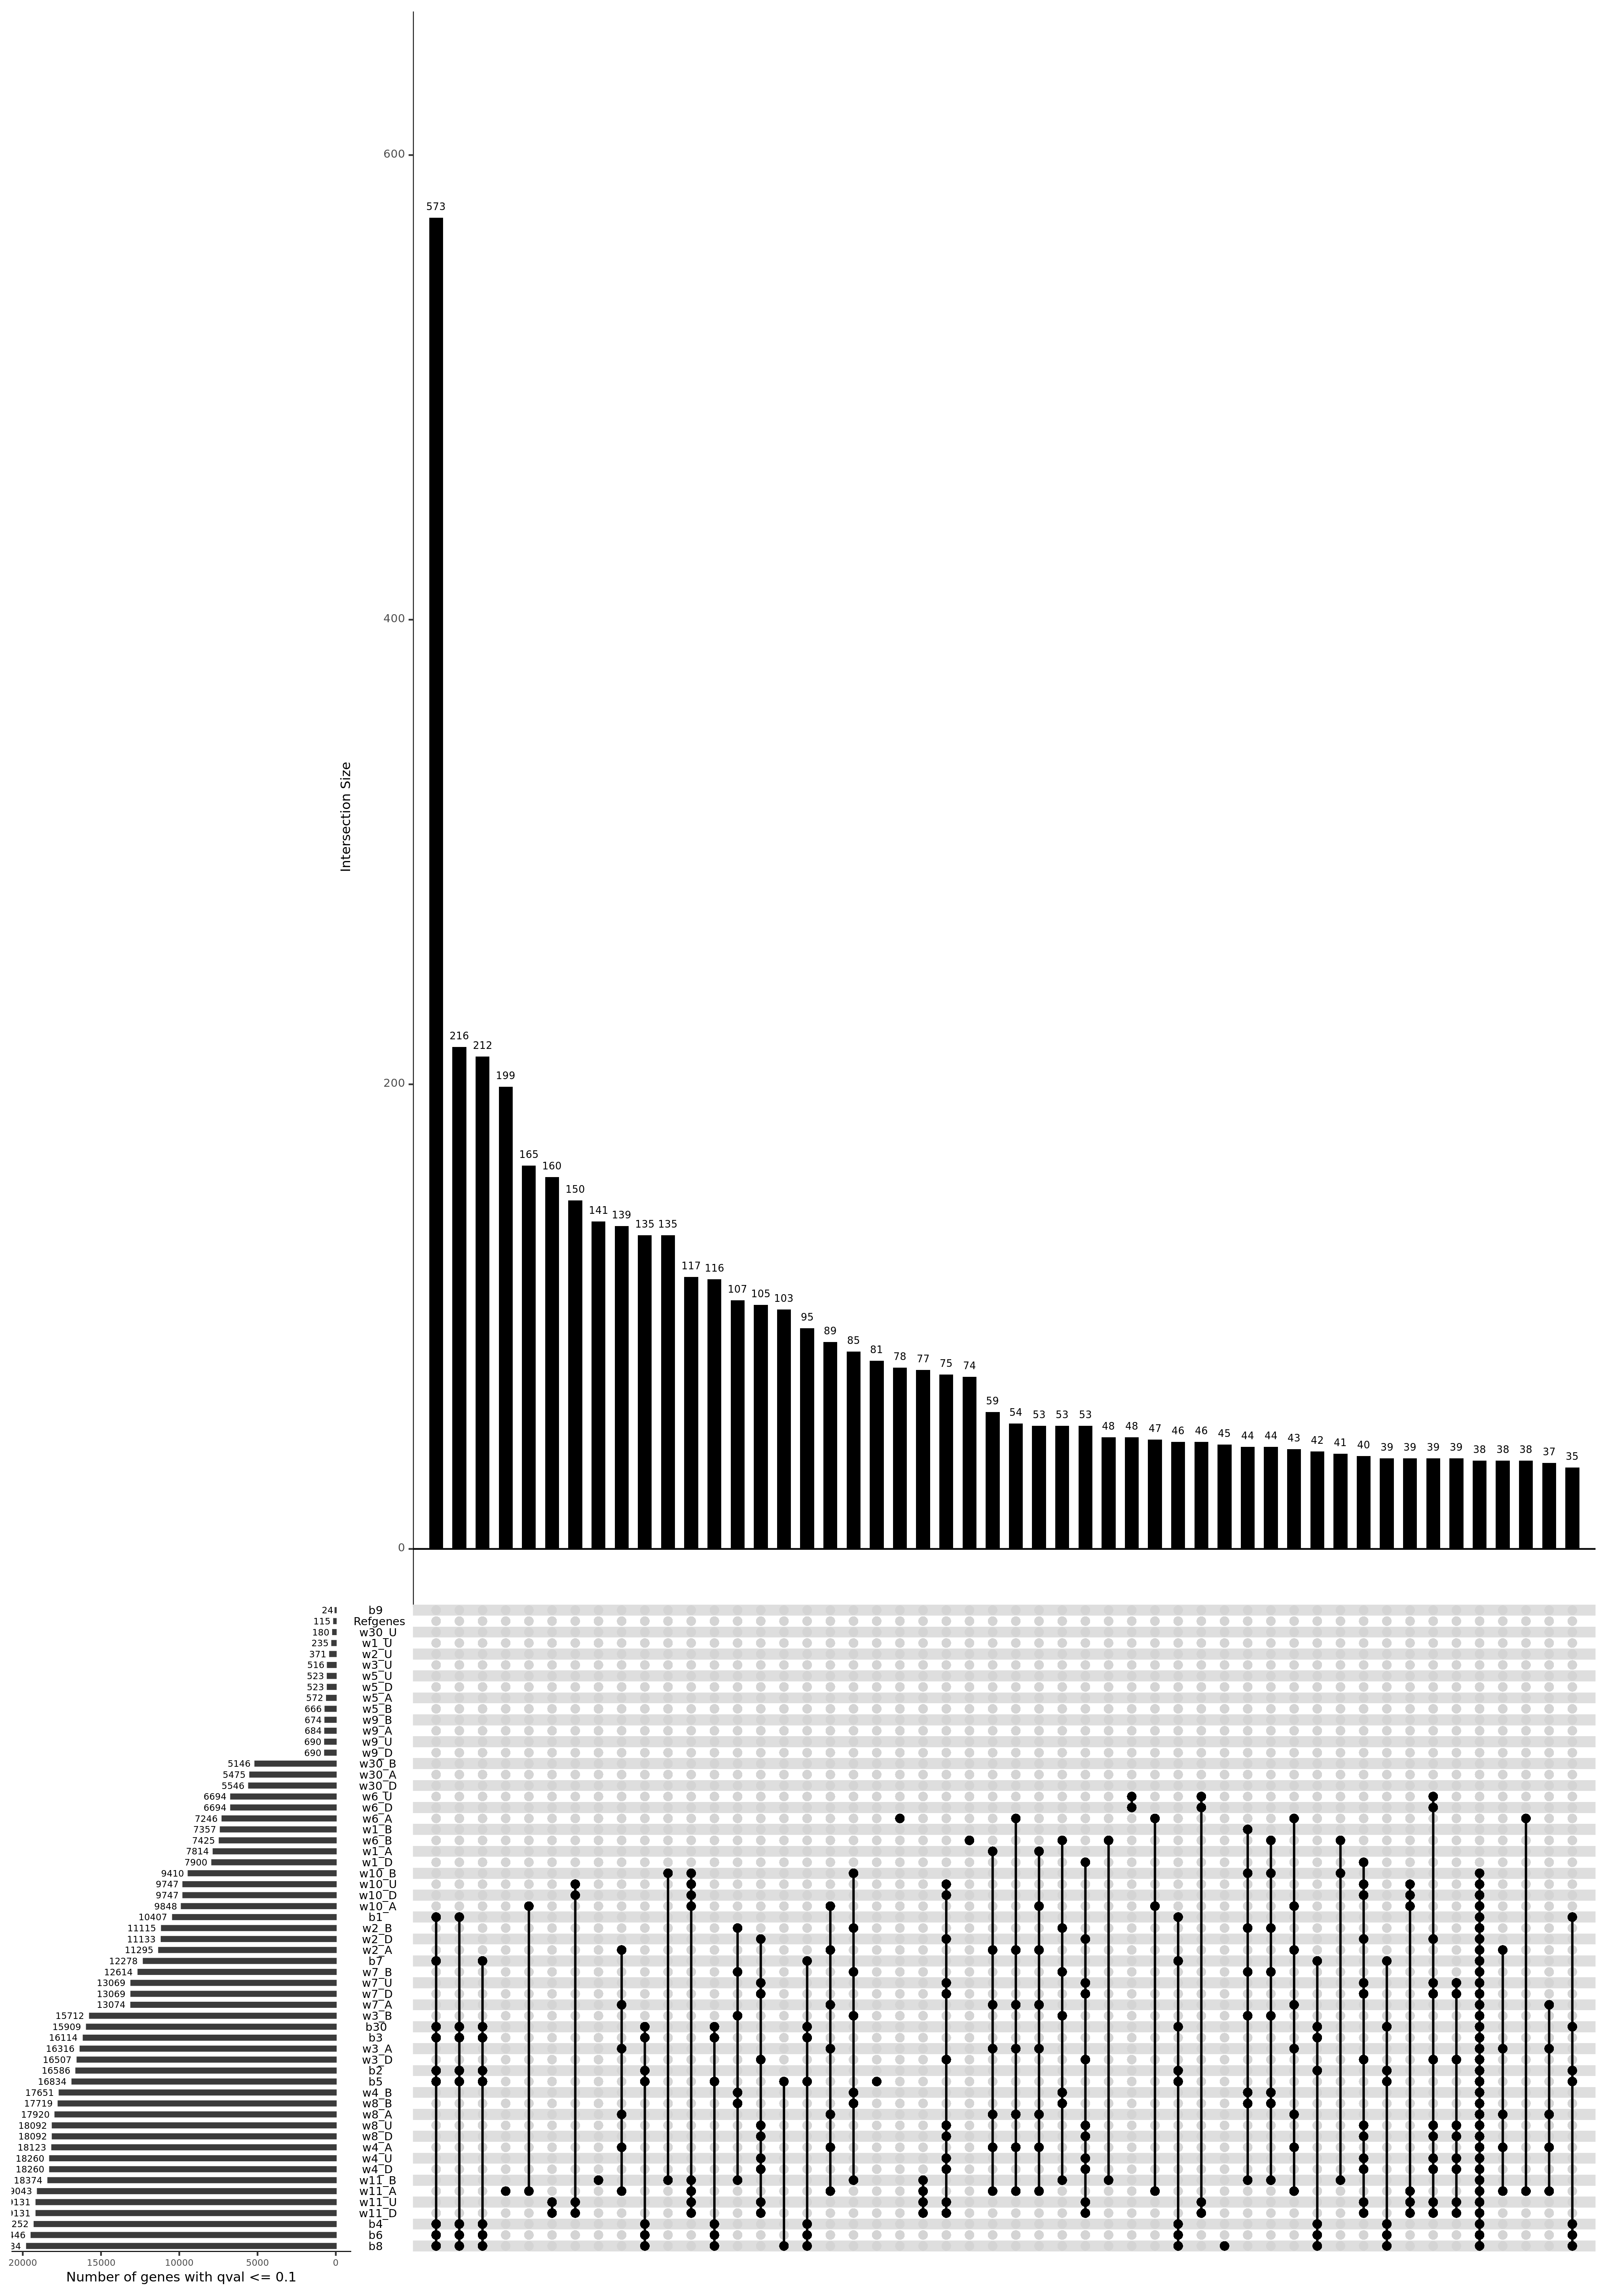

In [263]:
options(repr.plot.width = 14, repr.plot.height = 20, repr.plot.res = 300)
fam1 <- upset(u_b, sets = c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8", "b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.1")
fam1

In [264]:
# barley 0.05 deg translation into subfamilies and convert into single vector
b1 <- inner_join(b1_05, fam_bw, by = "gene")
b1 <- b1$subfamily
b2 <- inner_join(b2_05, fam_bw, by = "gene")
b2 <- b2$subfamily
b30 <- inner_join(b30_05, fam_bw, by = "gene")
b30 <- b30$subfamily
b3 <- inner_join(b3_05, fam_bw, by = "gene")
b3 <- b3$subfamily
b4 <- inner_join(b4_05, fam_bw, by = "gene")
b4 <- b4$subfamily
b5 <- inner_join(b5_05, fam_bw, by = "gene")
b5 <- b5$subfamily
b6 <- inner_join(b6_01, fam_bw, by = "gene")
b6 <- b6$subfamily
b7 <- inner_join(b7_05, fam_bw, by = "gene")
b7 <- b7$subfamily
b8 <- inner_join(b8_05, fam_bw, by = "gene")
b8 <- b8$subfamily
b9 <- inner_join(b9_05, fam_bw, by = "gene")
b9 <- b9$subfamily
# wheat A - 0.05 deg translation into subfamilies and convert into single vector
w1_A <- inner_join(w1_05, fam_wA, by = "gene")
w1_A <- w1_A$subfamily
w2_A <- inner_join(w2_05, fam_wA, by = "gene")
w2_A <- w2_A$subfamily
w30_A <- inner_join(w30_05, fam_wA, by = "gene")
w30_A <- w30_A$subfamily
w3_A <- inner_join(w3_05, fam_wA, by = "gene")
w3_A <- w3_A$subfamily
w4_A <- inner_join(w4_05, fam_wA, by = "gene")
w4_A <- w4_A$subfamily
w5_A <- inner_join(w5_05, fam_wA, by = "gene")
w5_A <- w5_A$subfamily
w6_A <- inner_join(w6_05, fam_wA, by = "gene")
w6_A <- w6_A$subfamily
w7_A <- inner_join(w7_05, fam_wA, by = "gene")
w7_A <- w7_A$subfamily
w8_A <- inner_join(w8_05, fam_wA, by = "gene")
w8_A <- w8_A$subfamily
w9_A <- inner_join(w9_05, fam_wA, by = "gene")
w9_A <- w9_A$subfamily
w10_A <- inner_join(w10_05, fam_wA, by = "gene")
w10_A <- w10_A$subfamily
w11_A <- inner_join(w11_05, fam_wA, by = "gene")
w11_A <- w11_A$subfamily
# wheat B - 0.05 deg translation into subfamilies and convert into single vector
w1_B <- inner_join(w1_05, fam_wB, by = "gene")
w1_B <- w1_B$subfamily
w2_B <- inner_join(w2_05, fam_wB, by = "gene")
w2_B <- w2_B$subfamily
w30_B <- inner_join(w30_05, fam_wB, by = "gene")
w30_B <- w30_B$subfamily
w3_B <- inner_join(w3_05, fam_wB, by = "gene")
w3_B <- w3_B$subfamily
w4_B <- inner_join(w4_05, fam_wB, by = "gene")
w4_B <- w4_B$subfamily
w5_B <- inner_join(w5_05, fam_wB, by = "gene")
w5_B <- w5_B$subfamily
w6_B <- inner_join(w6_05, fam_wB, by = "gene")
w6_B <- w6_B$subfamily
w7_B <- inner_join(w7_05, fam_wB, by = "gene")
w7_B <- w7_B$subfamily
w8_B <- inner_join(w8_05, fam_wB, by = "gene")
w8_B <- w8_B$subfamily
w9_B <- inner_join(w9_05, fam_wB, by = "gene")
w9_B <- w9_B$subfamily
w10_B <- inner_join(w10_05, fam_wB, by = "gene")
w10_B <- w10_B$subfamily
w11_B <- inner_join(w11_05, fam_wB, by = "gene")
w11_B <- w11_B$subfamily
# wheat D - 0.05 deg translation into subfamilies and convert into single vector
w1_D <- inner_join(w1_05, fam_wD, by = "gene")
w1_D <- w1_D$subfamily
w2_D <- inner_join(w2_05, fam_wD, by = "gene")
w2_D <- w2_D$subfamily
w30_D <- inner_join(w30_05, fam_wD, by = "gene")
w30_D <- w30_D$subfamily
w3_D <- inner_join(w3_05, fam_wD, by = "gene")
w3_D <- w3_D$subfamily
w4_D <- inner_join(w4_05, fam_wD, by = "gene")
w4_D <- w4_D$subfamily
w5_D <- inner_join(w5_05, fam_wD, by = "gene")
w5_D <- w5_D$subfamily
w6_D <- inner_join(w6_05, fam_wD, by = "gene")
w6_D <- w6_D$subfamily
w7_D <- inner_join(w7_05, fam_wD, by = "gene")
w7_D <- w7_D$subfamily
w8_D <- inner_join(w8_05, fam_wD, by = "gene")
w8_D <- w8_D$subfamily
w9_D <- inner_join(w9_05, fam_wD, by = "gene")
w9_D <- w9_D$subfamily
w10_D <- inner_join(w10_05, fam_wD, by = "gene")
w10_D <- w10_D$subfamily
w11_D <- inner_join(w11_05, fam_wD, by = "gene")
w11_D <- w11_D$subfamily
# wheat Unknown - 0.05 deg translation into subfamilies and convert into single vector
w1_U <- inner_join(w1_05, fam_wU, by = "gene")
w1_U <- w1_U$subfamily
w2_U <- inner_join(w2_05, fam_wU, by = "gene")
w2_U <- w2_U$subfamily
w30_U <- inner_join(w30_05, fam_wU, by = "gene")
w30_U <- w30_U$subfamily
w3_U <- inner_join(w3_05, fam_wU, by = "gene")
w3_U <- w3_U$subfamily
w4_U <- inner_join(w4_05, fam_wD, by = "gene")
w4_U <- w4_U$subfamily
w5_U <- inner_join(w5_05, fam_wD, by = "gene")
w5_U <- w5_U$subfamily
w6_U <- inner_join(w6_05, fam_wD, by = "gene")
w6_U <- w6_U$subfamily
w7_U <- inner_join(w7_05, fam_wD, by = "gene")
w7_U <- w7_U$subfamily
w8_U <- inner_join(w8_05, fam_wD, by = "gene")
w8_U <- w8_U$subfamily
w9_U <- inner_join(w9_05, fam_wD, by = "gene")
w9_U <- w9_U$subfamily
w10_U <- inner_join(w10_05, fam_wD, by = "gene")
w10_U <- w10_U$subfamily
w11_U <- inner_join(w11_05, fam_wD, by = "gene")
w11_U <- w11_U$subfamily

In [265]:
# build upset object for barley with qval <= 0.05
listInput_b <- list(r, b1, b2, b30, b3, b4, b5, b6, b7, b8, b9, 
                    w1_A, w2_A, w30_A, w3_A, w4_A, w5_A, w6_A, w7_A, w8_A, w9_A, w10_A, w11_A,  
                    w1_B, w2_B, w30_B, w3_B, w4_B, w5_B, w6_B, w7_B, w8_B, w9_B, w10_B, w11_B,
                    w1_D, w2_D, w30_D, w3_D, w4_D, w5_D, w6_D, w7_D, w8_D, w9_D, w10_D, w11_D,
                    w1_U, w2_U, w30_U, w3_U, w4_U, w5_U, w6_U, w7_U, w8_U, w9_U, w10_U, w11_U)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8","b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U")
str(u_b)

'data.frame':	30100 obs. of  59 variables:
 $ Refgenes: int  1 1 1 1 1 1 1 1 1 1 ...
 $ b1      : int  1 0 0 0 0 0 0 0 0 0 ...
 $ b2      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b30     : int  0 0 0 0 0 0 0 1 0 1 ...
 $ b3      : int  1 0 0 0 0 0 0 1 0 0 ...
 $ b4      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b5      : int  0 0 0 0 0 0 0 1 0 1 ...
 $ b6      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b7      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ b8      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b9      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w1_A    : int  0 0 0 0 0 0 0 1 0 1 ...
 $ w2_A    : int  1 0 0 1 0 0 0 1 0 0 ...
 $ w30_A   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w3_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w4_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w5_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w6_A    : int  1 0 0 1 0 0 0 0 0 0 ...
 $ w7_A    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ w8_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w9_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w10_A   : int  1 0 0 0 0 0 0 1 0 1 ...
 $ w11_A   : int  1 0 0 1 0 0 0 1

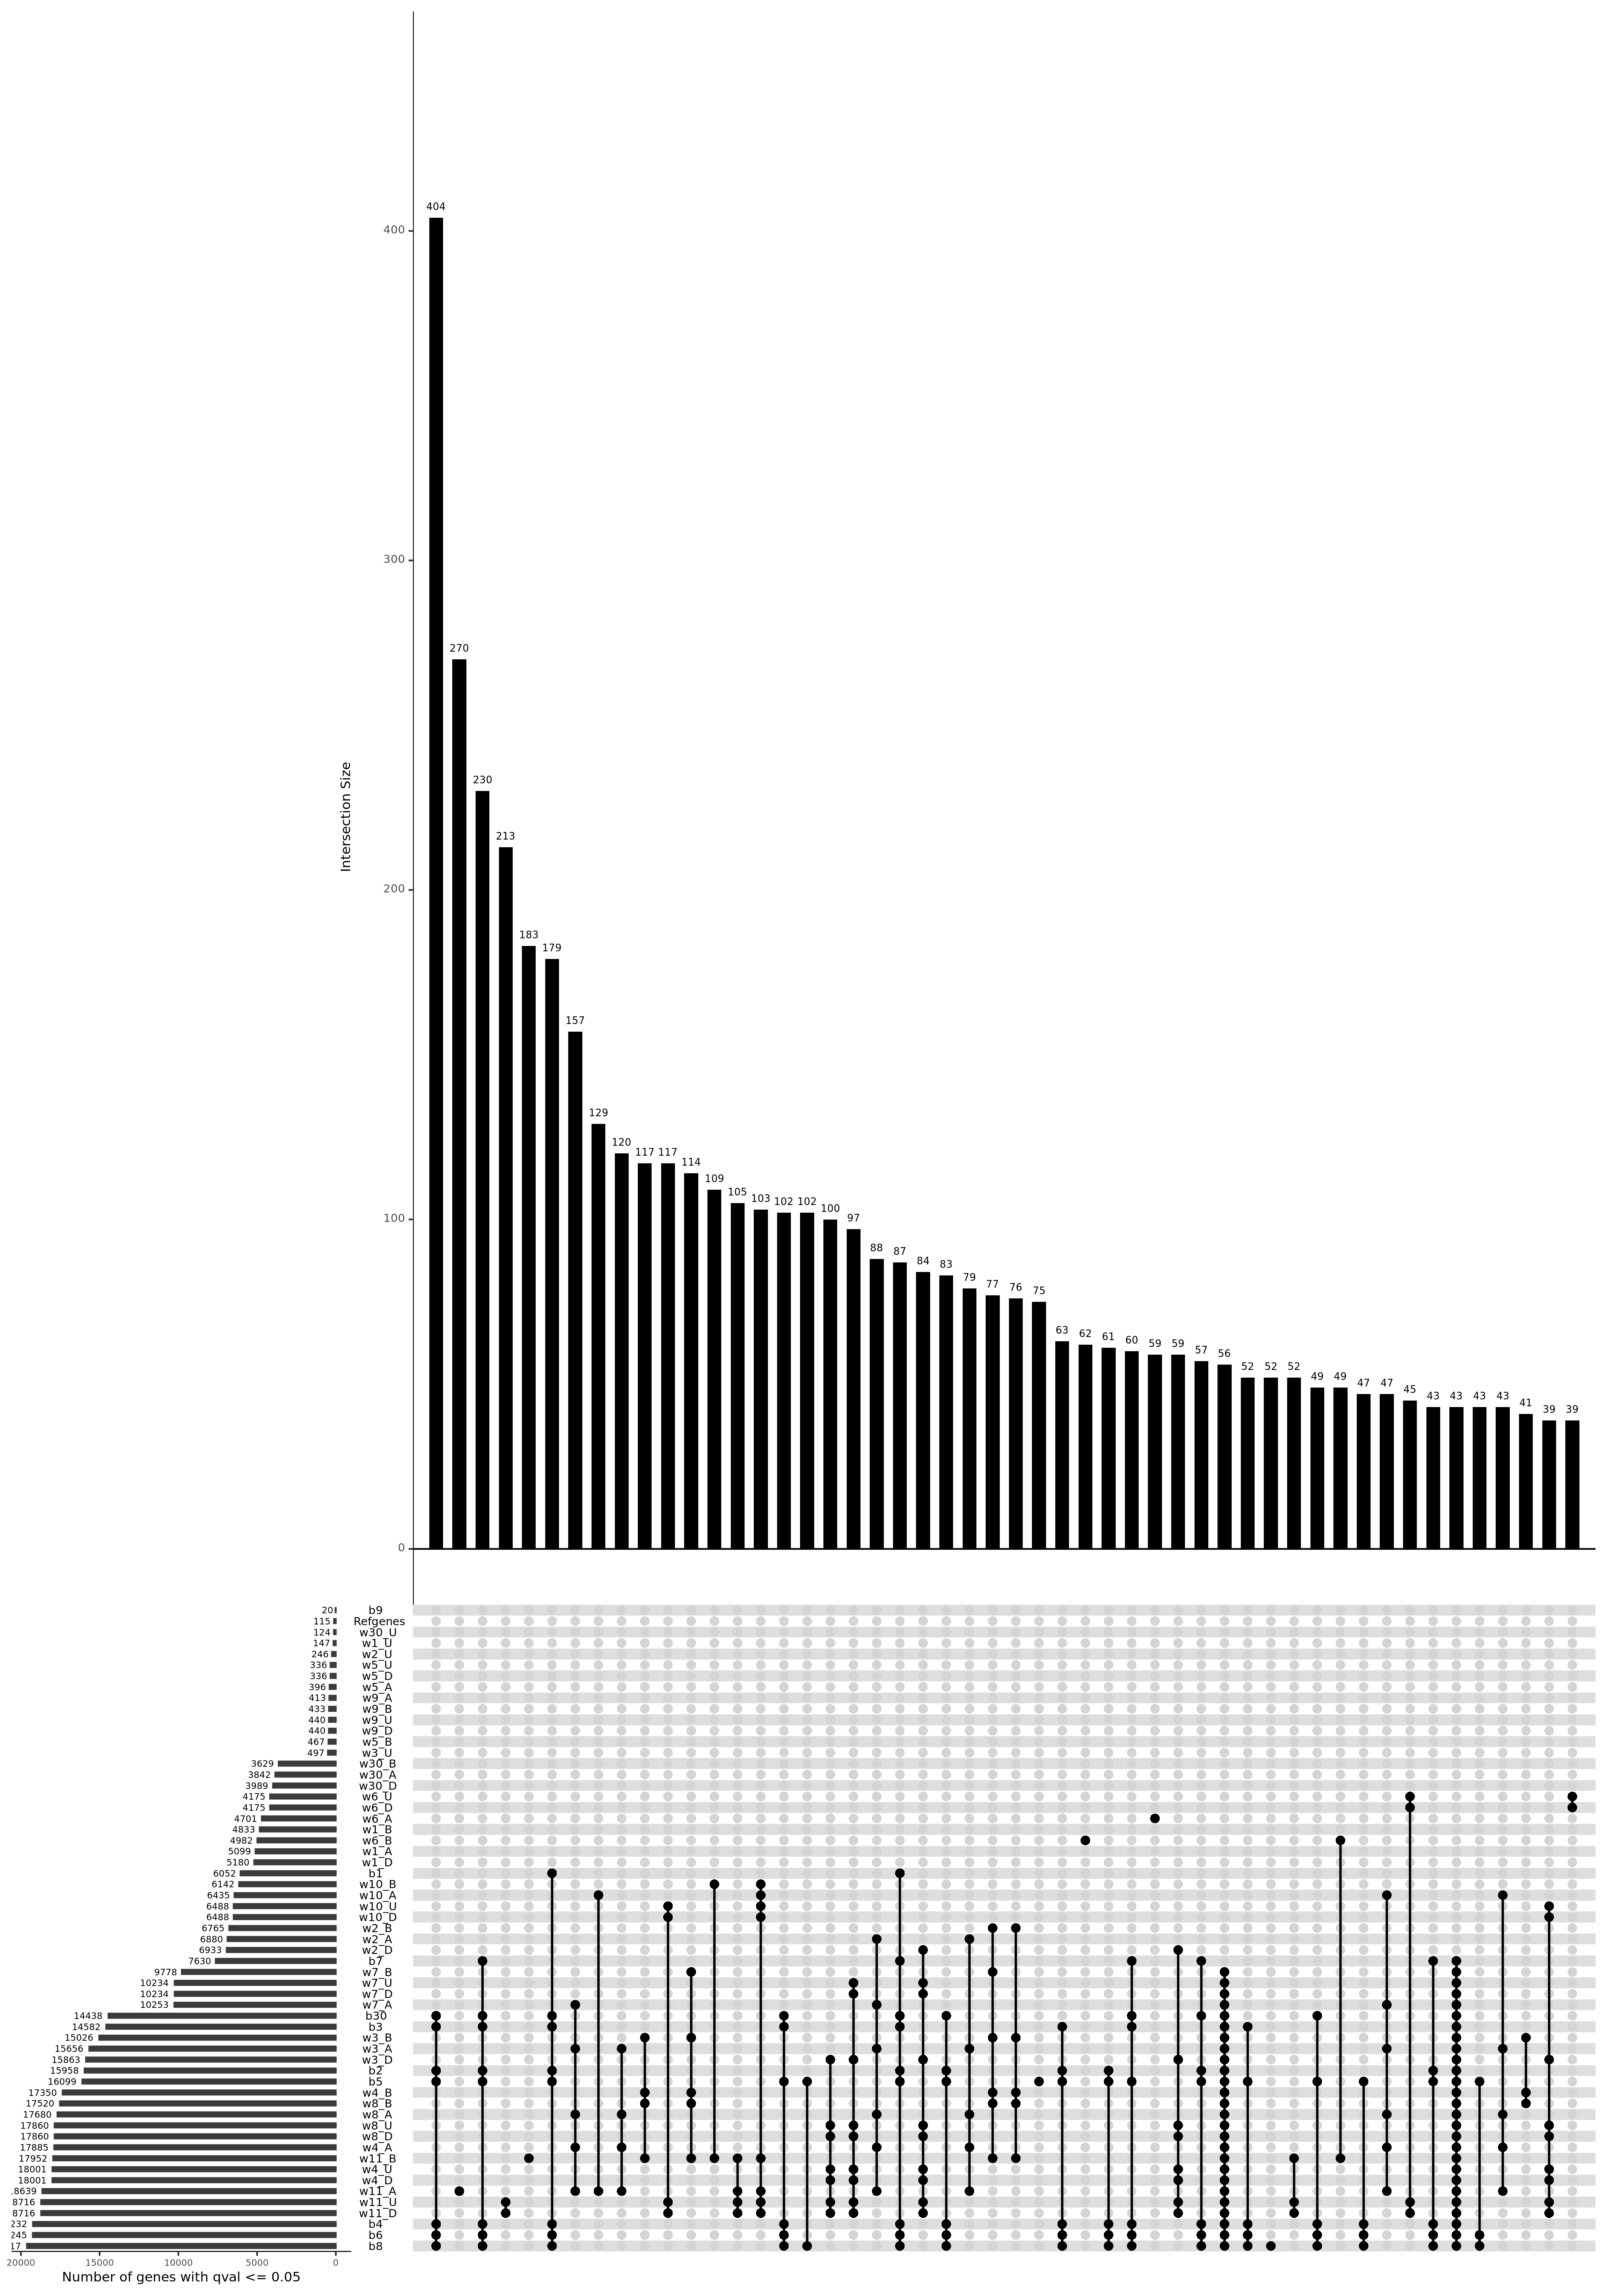

In [266]:
options(repr.plot.width = 14, repr.plot.height = 20, repr.plot.res = 300)
fam0_05 <- upset(u_b, sets = c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8", "b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.05")
fam0_05

In [267]:
# barley 0.01 deg translation into subfamilies and convert into single vector
b1 <- inner_join(b1_01, fam_bw, by = "gene")
b1 <- b1$subfamily
b2 <- inner_join(b2_01, fam_bw, by = "gene")
b2 <- b2$subfamily
b30 <- inner_join(b30_01, fam_bw, by = "gene")
b30 <- b30$subfamily
b3 <- inner_join(b3_01, fam_bw, by = "gene")
b3 <- b3$subfamily
b4 <- inner_join(b4_01, fam_bw, by = "gene")
b4 <- b4$subfamily
b5 <- inner_join(b5_01, fam_bw, by = "gene")
b5 <- b5$subfamily
b6 <- inner_join(b6_01, fam_bw, by = "gene")
b6 <- b6$subfamily
b7 <- inner_join(b7_01, fam_bw, by = "gene")
b7 <- b7$subfamily
b8 <- inner_join(b8_01, fam_bw, by = "gene")
b8 <- b8$subfamily
b9 <- inner_join(b9_01, fam_bw, by = "gene")
b9 <- b9$subfamily
# wheat A - 0.01 deg translation into subfamilies and convert into single vector
w1_A <- inner_join(w1_01, fam_wA, by = "gene")
w1_A <- w1_A$subfamily
w2_A <- inner_join(w2_01, fam_wA, by = "gene")
w2_A <- w2_A$subfamily
w30_A <- inner_join(w30_01, fam_wA, by = "gene")
w30_A <- w30_A$subfamily
w3_A <- inner_join(w3_01, fam_wA, by = "gene")
w3_A <- w3_A$subfamily
w4_A <- inner_join(w4_01, fam_wA, by = "gene")
w4_A <- w4_A$subfamily
w5_A <- inner_join(w5_01, fam_wA, by = "gene")
w5_A <- w5_A$subfamily
w6_A <- inner_join(w6_01, fam_wA, by = "gene")
w6_A <- w6_A$subfamily
w7_A <- inner_join(w7_01, fam_wA, by = "gene")
w7_A <- w7_A$subfamily
w8_A <- inner_join(w8_01, fam_wA, by = "gene")
w8_A <- w8_A$subfamily
w9_A <- inner_join(w9_01, fam_wA, by = "gene")
w9_A <- w9_A$subfamily
w10_A <- inner_join(w10_01, fam_wA, by = "gene")
w10_A <- w10_A$subfamily
w11_A <- inner_join(w11_01, fam_wA, by = "gene")
w11_A <- w11_A$subfamily
# wheat B - 0.01 deg translation into subfamilies and convert into single vector
w1_B <- inner_join(w1_01, fam_wB, by = "gene")
w1_B <- w1_B$subfamily
w2_B <- inner_join(w2_01, fam_wB, by = "gene")
w2_B <- w2_B$subfamily
w30_B <- inner_join(w30_01, fam_wB, by = "gene")
w30_B <- w30_B$subfamily
w3_B <- inner_join(w3_01, fam_wB, by = "gene")
w3_B <- w3_B$subfamily
w4_B <- inner_join(w4_01, fam_wB, by = "gene")
w4_B <- w4_B$subfamily
w5_B <- inner_join(w5_01, fam_wB, by = "gene")
w5_B <- w5_B$subfamily
w6_B <- inner_join(w6_01, fam_wB, by = "gene")
w6_B <- w6_B$subfamily
w7_B <- inner_join(w7_01, fam_wB, by = "gene")
w7_B <- w7_B$subfamily
w8_B <- inner_join(w8_01, fam_wB, by = "gene")
w8_B <- w8_B$subfamily
w9_B <- inner_join(w9_01, fam_wB, by = "gene")
w9_B <- w9_B$subfamily
w10_B <- inner_join(w10_01, fam_wB, by = "gene")
w10_B <- w10_B$subfamily
w11_B <- inner_join(w11_01, fam_wB, by = "gene")
w11_B <- w11_B$subfamily
# wheat D - 0.01 deg translation into subfamilies and convert into single vector
w1_D <- inner_join(w1_01, fam_wD, by = "gene")
w1_D <- w1_D$subfamily
w2_D <- inner_join(w2_01, fam_wD, by = "gene")
w2_D <- w2_D$subfamily
w30_D <- inner_join(w30_01, fam_wD, by = "gene")
w30_D <- w30_D$subfamily
w3_D <- inner_join(w3_01, fam_wD, by = "gene")
w3_D <- w3_D$subfamily
w4_D <- inner_join(w4_01, fam_wD, by = "gene")
w4_D <- w4_D$subfamily
w5_D <- inner_join(w5_01, fam_wD, by = "gene")
w5_D <- w5_D$subfamily
w6_D <- inner_join(w6_01, fam_wD, by = "gene")
w6_D <- w6_D$subfamily
w7_D <- inner_join(w7_01, fam_wD, by = "gene")
w7_D <- w7_D$subfamily
w8_D <- inner_join(w8_01, fam_wD, by = "gene")
w8_D <- w8_D$subfamily
w9_D <- inner_join(w9_01, fam_wD, by = "gene")
w9_D <- w9_D$subfamily
w10_D <- inner_join(w10_01, fam_wD, by = "gene")
w10_D <- w10_D$subfamily
w11_D <- inner_join(w11_01, fam_wD, by = "gene")
w11_D <- w11_D$subfamily
# wheat Unknown - 0.01 deg translation into subfamilies and convert into single vector
w1_U <- inner_join(w1_01, fam_wU, by = "gene")
w1_U <- w1_U$subfamily
w2_U <- inner_join(w2_01, fam_wU, by = "gene")
w2_U <- w2_U$subfamily
w30_U <- inner_join(w30_01, fam_wU, by = "gene")
w30_U <- w30_U$subfamily
w3_U <- inner_join(w3_01, fam_wU, by = "gene")
w3_U <- w3_U$subfamily
w4_U <- inner_join(w4_01, fam_wU, by = "gene")
w4_U <- w4_U$subfamily
w5_U <- inner_join(w5_01, fam_wU, by = "gene")
w5_U <- w5_U$subfamily
w6_U <- inner_join(w6_01, fam_wU, by = "gene")
w6_U <- w6_U$subfamily
w7_U <- inner_join(w7_01, fam_wU, by = "gene")
w7_U <- w7_U$subfamily
w8_U <- inner_join(w8_01, fam_wU, by = "gene")
w8_U <- w8_U$subfamily
w9_U <- inner_join(w9_01, fam_wU, by = "gene")
w9_U <- w9_U$subfamily
w10_U <- inner_join(w10_01, fam_wU, by = "gene")
w10_U <- w10_U$subfamily
w11_U <- inner_join(w11_01, fam_wU, by = "gene")
w11_U <- w11_U$subfamily

In [276]:
glimpse(b30)

 chr [1:7571] "OG0003495.1" "OG0001813.1" "OG0000170.1" "OG0000170.1" ...


In [268]:
# build upset object for barley with qval <= 0.01
listInput_b <- list(r, b1, b2, b30, b3, b4, b5, b6, b7, b8, b9, 
                    w1_A, w2_A, w30_A, w3_A, w4_A, w5_A, w6_A, w7_A, w8_A, w9_A, w10_A, w11_A,  
                    w1_B, w2_B, w30_B, w3_B, w4_B, w5_B, w6_B, w7_B, w8_B, w9_B, w10_B, w11_B,
                    w1_D, w2_D, w30_D, w3_D, w4_D, w5_D, w6_D, w7_D, w8_D, w9_D, w10_D, w11_D,
                    w1_U, w2_U, w30_U, w3_U, w4_U, w5_U, w6_U, w7_U, w8_U, w9_U, w10_U, w11_U)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8","b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U")
str(u_b)

'data.frame':	29977 obs. of  59 variables:
 $ Refgenes: int  1 1 1 1 1 1 1 1 1 1 ...
 $ b1      : int  1 0 0 0 0 0 0 0 0 0 ...
 $ b2      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b30     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ b3      : int  0 0 0 0 0 0 0 1 0 0 ...
 $ b4      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b5      : int  0 0 0 0 0 0 0 1 0 1 ...
 $ b6      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b7      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ b8      : int  1 0 0 0 0 0 0 1 0 1 ...
 $ b9      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w1_A    : int  0 0 0 0 0 0 0 1 0 0 ...
 $ w2_A    : int  1 0 0 1 0 0 0 1 0 0 ...
 $ w30_A   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w3_A    : int  1 0 0 1 0 0 0 0 0 0 ...
 $ w4_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w5_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w6_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w7_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w8_A    : int  1 0 0 1 0 0 0 1 0 1 ...
 $ w9_A    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w10_A   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ w11_A   : int  1 0 0 1 0 0 0 1

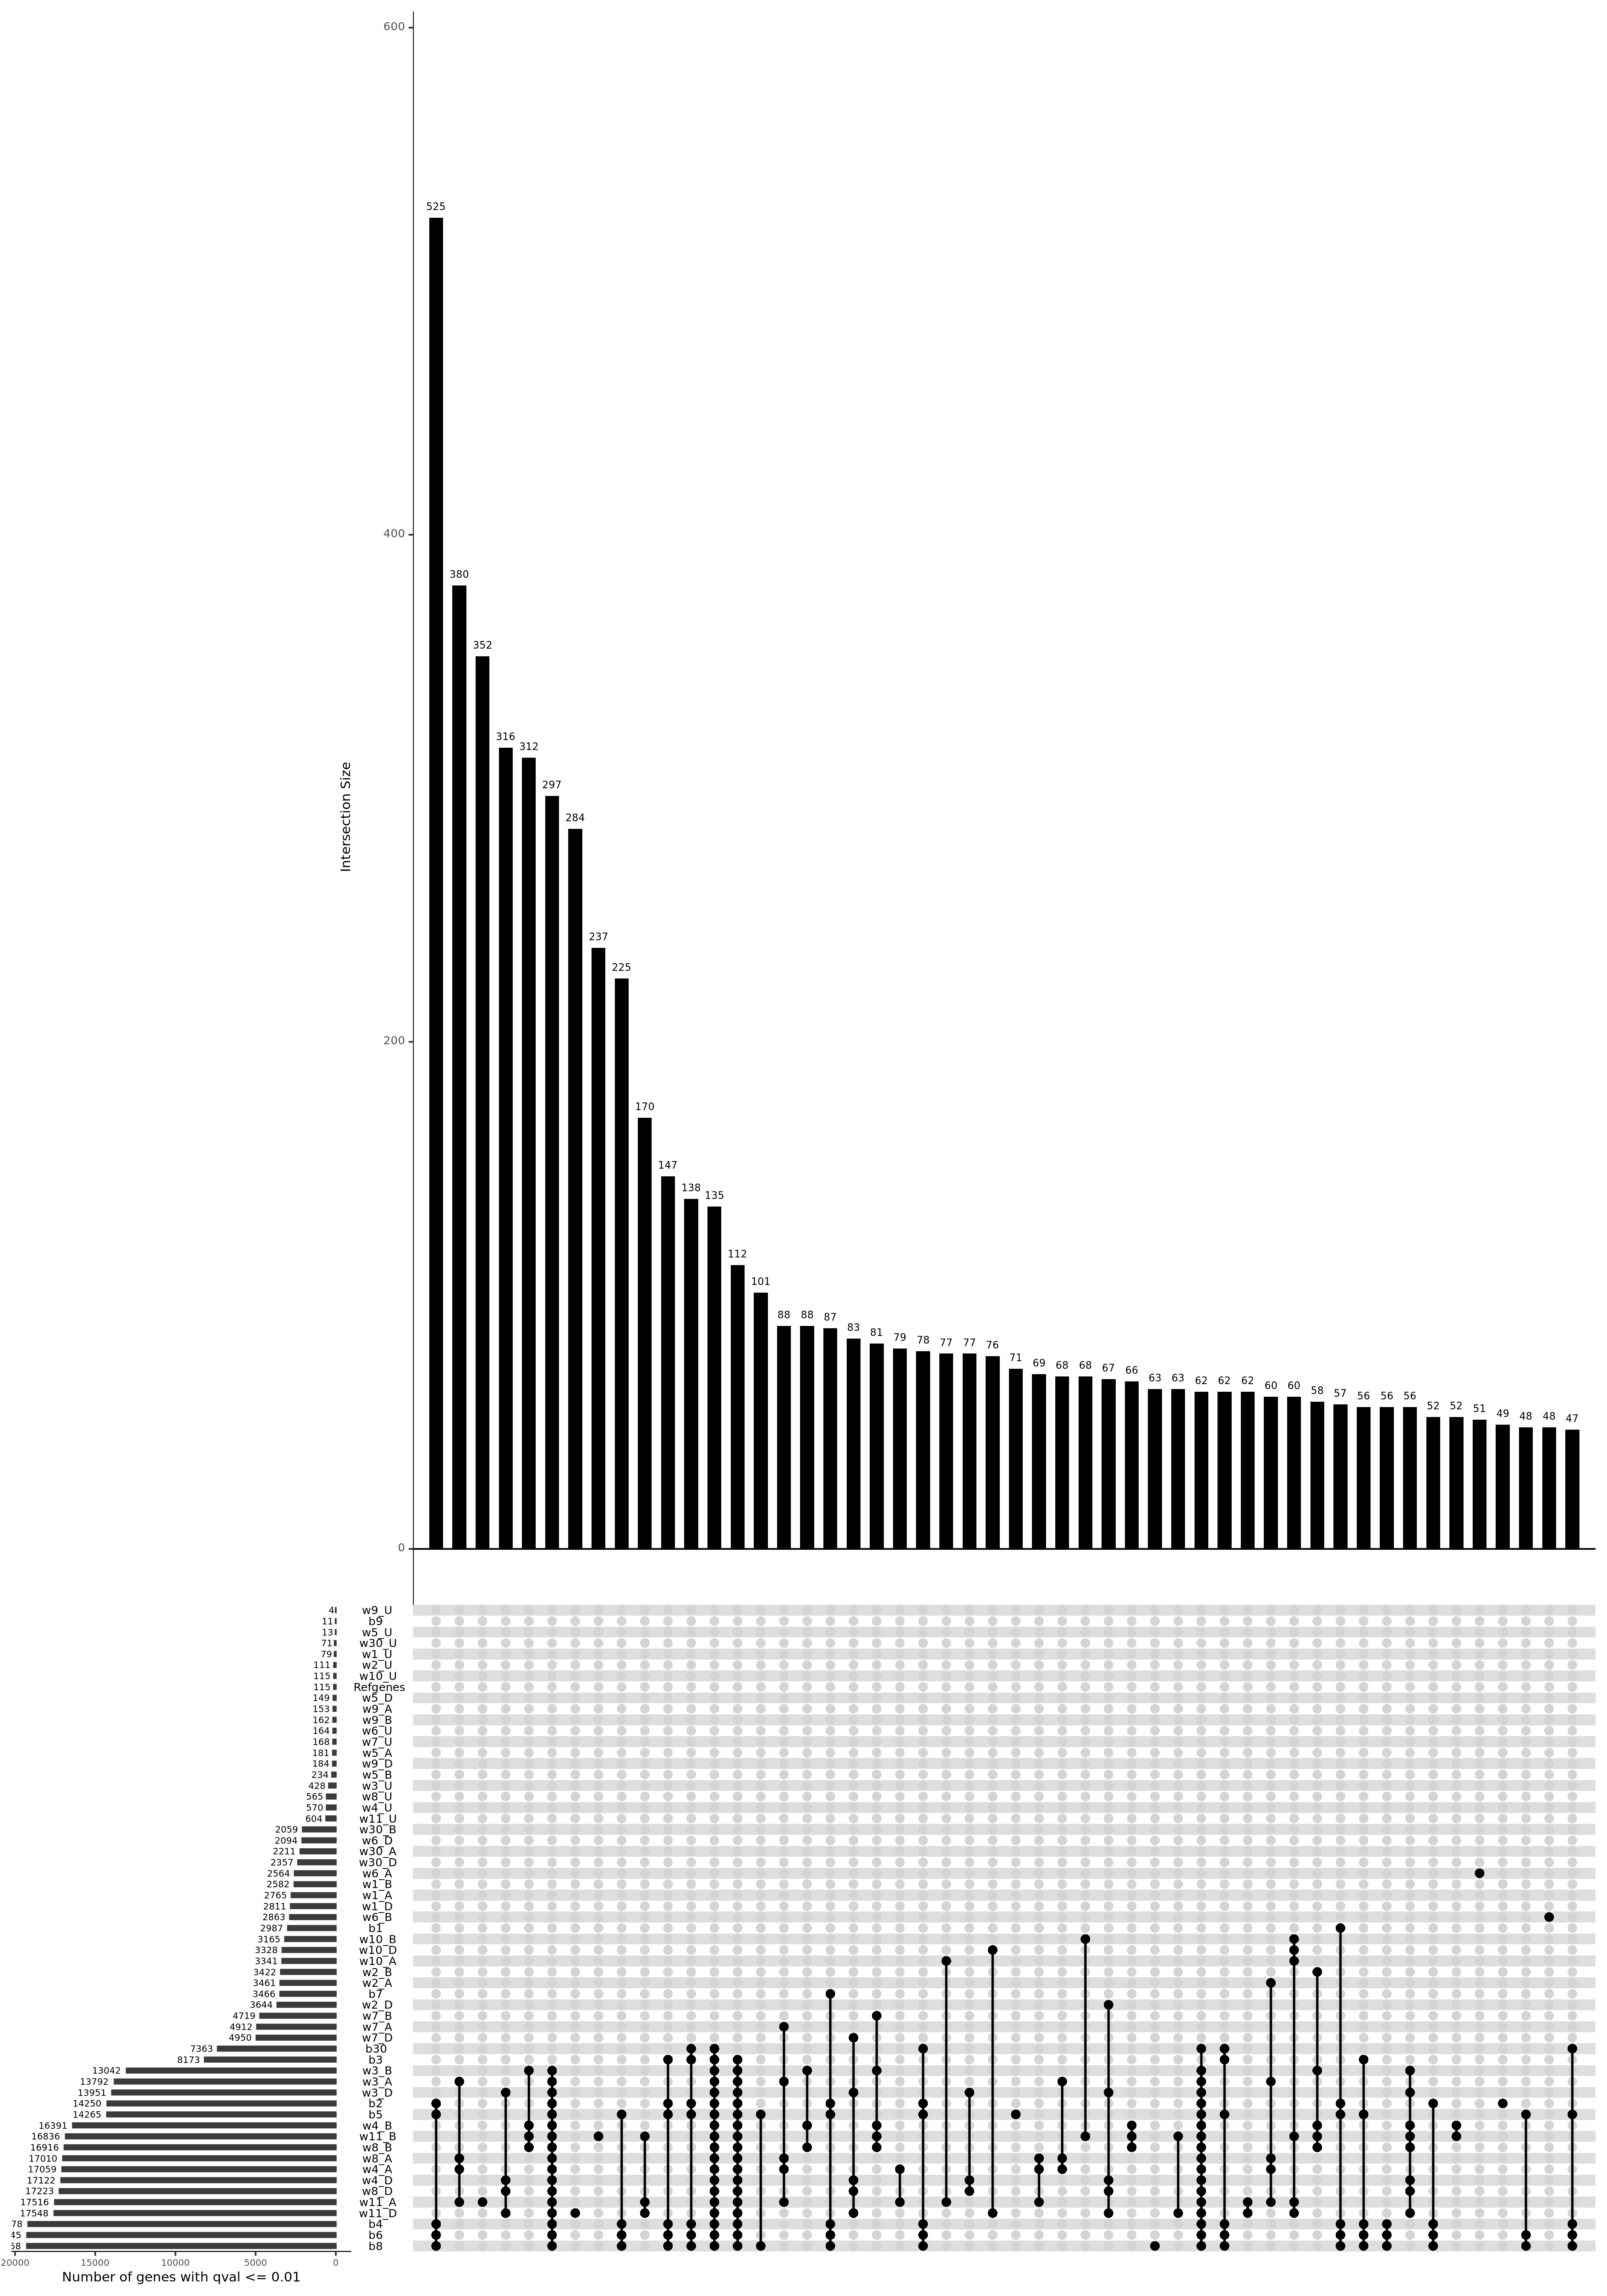

In [269]:
options(repr.plot.width = 14, repr.plot.height = 20, repr.plot.res = 300)
fam0_01 <- upset(u_b, sets = c("Refgenes", "b1", "b2", "b30", "b3", "b4", "b5", "b6", "b7", "b8", "b9",
                            "w1_A", "w2_A", "w30_A", "w3_A", "w4_A", "w5_A", "w6_A", "w7_A", "w8_A", "w9_A", "w10_A", "w11_A",
                            "w1_B", "w2_B", "w30_B", "w3_B", "w4_B", "w5_B", "w6_B", "w7_B", "w8_B", "w9_B", "w10_B", "w11_B",
                            "w1_D", "w2_D", "w30_D", "w3_D", "w4_D", "w5_D", "w6_D", "w7_D", "w8_D", "w9_D", "w10_D", "w11_D",
                            "w1_U", "w2_U", "w30_U", "w3_U", "w4_U", "w5_U", "w6_U", "w7_U", "w8_U", "w9_U", "w10_U", "w11_U"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.01")
fam0_01

In [281]:
glimpse(unique(b7))

 chr [1:3466] "OG0003495.1" "OG0009065.1" "OG0005264.1" "OG0003316.1" ...


In [372]:
# finding shared subfamilies for visualization
# 1st set (6): cr, b30, 
# 2nd set (1): cr, b7, w1_A, w30_A, w10_A, w1_B, w30_B, w10_B, w1_D, w30_D, w7_D, w10_D

six <- list(cr, unique(b30))
one <- list(cr, b7, w1_A, w30_A, w10_A, w1_B, w30_B, w10_B, w1_D, w30_D, w7_D, w10_D)
glimpse(six)

# 36 is shared between these two, but only 6 of them is shared between them without intersecting other sets as well
s <- Venn(six)
si <- as.data.frame(overlap(s))
six <- si %>% distinct(overlap(s))
glimpse(unique(six))
#unique(six)
# intersect them with ref table to get uniprot entries
colnames(six) <- c("subfamily")
six_u <- inner_join(six, ref, by = "subfamily")
six_u <- six_u %>% distinct(Entry)
glimpse(six_u)
# okay it became 50 hits, lets just investigate them one by one
six_OG0000818.2 <- filter(ref, subfamily == "OG0000818.2") %>% distinct(Entry)
glimpse(six_OG0000818.2)
# Q9ATG4 - Non-specific lipid-transfer protein
six_OG0000838.2 <- filter(ref, subfamily == "OG0000838.2") %>% distinct(Entry)
glimpse(six_OG0000838.2)
# Q1G191 -  MADS-box transcription factor TaAGL16
six_OG0000838.6 <- filter(ref, subfamily == "OG0000838.6") %>% distinct(Entry)
glimpse(six_OG0000838.6)
# Q1G169 - MADS-box protein, Q70JR1 - Putative MADS-box protein 7, Q1G184 - MADS-box transcription factor TaAGL24
six_OG0003566.1 <- filter(ref, subfamily == "OG0003566.1") %>% distinct(Entry)
glimpse(six_OG0003566.1)
# A9J1V8 - MIKC-type MADS-box transcription factor WM1A, Q1G162 - MADS-box transcription factor TaAGL7
six_OG0016990.1 <- filter(ref, subfamily == "OG0016990.1") %>% distinct(Entry)
glimpse(six_OG0016990.1)


# to find the 6 we looking for...
set36 <- unique(six)$subfamily
vennobject <- list(set36, b1, b7, w1_A, w30_A, w7_A, w10_A, w1_B, w30_B, w7_B, w10_B, w1_D, w30_D, w7_D, w10_D, w1_U, w30_U, w7_U, w10_U)
glimpse(vennobject)
vennobject <- Venn(vennobject)
final_discerned <- as.data.frame(discern(vennobject, 1, c(2:19)))
glimpse(final_discerned)
# intersect them with ref table to get uniprot entries
colnames(final_discerned) <- c("subfamily")
final_u <- inner_join(final_discerned, ref, by = "subfamily")
final_k <- filter(final_u, subfamily == "OG0000838.6")
glimpse(final_k)
final_u <- final_u %>% distinct(Entry)
glimpse(final_u)

# find this family in other sets OG0000838.6
f <- c("OG0000838.6")
vennobject <- list(f, b1, b7, w1_A, w30_A, w7_A, w10_A, w1_B, w30_B, w7_B, w10_B, w1_D, w30_D, w7_D, w10_D, w1_U, w30_U, w7_U, w10_U)
glimpse(vennobject)
vennobject <- Venn(vennobject)
final_over <- as.data.frame(overlap(vennobject, c(1, 2, 10, 13, 14))) # 1:18 gives error, but in the error it had results, 2-10-13-14 has this family -> b1, w7_B, w30_D, w7_D
glimpse(final_over)




# one
o <- Venn(one)
on <- as.data.frame(overlap(o))
one <- on %>% distinct(overlap(o))
glimpse(one)
#interesct it with ref table to get uniprot entry
colnames(one) <- c("subfamily")
one_u <- inner_join(one, ref, by = "subfamily") %>% distinct(Entry)
glimpse(one_u)

List of 2
 $ : chr [1:118] "NP2" "NP3" "NP1" "OG0000838.1" ...
 $ : chr [1:7363] "OG0003495.1" "OG0001813.1" "OG0000170.1" "OG0000543.7" ...
Rows: 36
Columns: 1
$ `overlap(s)` <chr> "OG0000818.2", "OG0000838.2", "OG0000838.6", "OG0003566.…
Rows: 50
Columns: 1
$ Entry <chr> "Q9ATG4", "Q1G191", "Q1G169", "Q70JR1", "Q1G184", "A9J1V8", "Q1…
Rows: 1
Columns: 1
$ Entry <chr> "Q9ATG4"
Rows: 1
Columns: 1
$ Entry <chr> "Q1G191"
Rows: 3
Columns: 1
$ Entry <chr> "Q1G169", "Q70JR1", "Q1G184"
Rows: 2
Columns: 1
$ Entry <chr> "A9J1V8", "Q1G162"
Rows: 1
Columns: 1
$ Entry <chr> "Q1G188"
List of 19
 $ : chr [1:36] "OG0000818.2" "OG0000838.2" "OG0000838.6" "OG0003566.1" ...
 $ : chr [1:3039] "OG0003495.1" "OG0000298.2" "OG0000298.2" "OG0009749.1" ...
 $ : chr [1:3590] "OG0003495.1" "OG0009065.1" "OG0005264.1" "OG0003316.1" ...
 $ : chr [1:2840] "OG0000576.1" "OG0000170.1" "OG0000170.1" "OG0040679.1" ...
 $ : chr [1:2263] "OG0000576.1" "OG0000070.1" "OG0009065.1" "OG0000543.7" ...
 $ : chr [1:5058] "OG0

Warning message:
“Column `subfamily` joining factor and character vector, coercing into character vector”

Rows: 0
Columns: 4
$ subfamily  <chr> 
$ Entry      <chr> 
$ taxon      <chr> 
$ display_id <chr> 
Rows: 6
Columns: 1
$ Entry <chr> "Q8RVT1", "Q70AJ6", "Q70AI2", "Q70JR4", "Q70JP3", "Q2TN83"
List of 19
 $ : chr "OG0000838.6"
 $ : chr [1:3039] "OG0003495.1" "OG0000298.2" "OG0000298.2" "OG0009749.1" ...
 $ : chr [1:3590] "OG0003495.1" "OG0009065.1" "OG0005264.1" "OG0003316.1" ...
 $ : chr [1:2840] "OG0000576.1" "OG0000170.1" "OG0000170.1" "OG0040679.1" ...
 $ : chr [1:2263] "OG0000576.1" "OG0000070.1" "OG0009065.1" "OG0000543.7" ...
 $ : chr [1:5058] "OG0000576.1" "OG0002136.2" "OG0005716.2" "OG0000070.1" ...
 $ : chr [1:3425] "OG0002136.2" "OG0005264.1" "OG0000170.1" "OG0006529.1" ...
 $ : chr [1:2666] "OG0000298.18" "OG0025584.1" "OG0000298.2" "OG0000999.3" ...
 $ : chr [1:2105] "OG0000298.1" "OG0000497.17" "OG0000543.7" "OG0000376.17" ...
 $ : chr [1:4898] "OG0009924.1" "OG0025641.1" "OG0002380.2" "OG0001813.1" ...
 $ : chr [1:3222] "OG0000298.2" "OG0005716.2" "OG0003495.1" "OG0006529

# Figure

In [333]:
all_s <- list(cr, fam_bw_subfam)
all_s <- Venn(all_s)
all_s <- as.data.frame(unite(all_s), stringsAsFactors = FALSE)
colnames(all_s) <- c("Subfamily")
all_s$Subfamily <- as.factor(all_s$Subfamily)
glimpse(all_s)

Rows: 46,932
Columns: 1
$ Subfamily <fct> NP2, NP3, NP1, OG0000838.1, OG0000210.1, OG0040053.1, OG002…


In [334]:
# build upset object for barley with qval <= 0.01

listInput_b <- list(fam_bw_subfam, cr, b1, b30, b7, 
                    w1_A, w30_A, w7_A, w10_A,  
                    w1_B, w30_B, w7_B, w10_B, 
                    w1_D, w30_D, w7_D, w10_D,
                    w1_U, w30_U, w7_U, w10_U)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Whole family table", "Text-mining set", "Barley - Inflorescence", "Barley - Primordium", "Barley - Anther",
                                   "Wheat A - Inflorescence", "Wheat A - Primordium", "Wheat A - Anther", "Wheat A - MS",
                                   "Wheat B - Inflorescence", "Wheat B - Primordium", "Wheat B - Anther", "Wheat B - MS",
                                   "Wheat D - Inflorescence", "Wheat D - Primordium", "Wheat D - Anther", "Wheat D - MS",
                                   "Wheat Un - Inflorescence", "Wheat Un - Primordium", "Wheat Un - Anther", "Wheat Un - MS")
# assignment of DEG order: "Barley-Inflorescence", "Barley-Primordium", "Barley-Anther",
                        # "Wheat/A-Inflorescence", "Wheat/A-Primordium", "Wheat/A-Anther", "Wheat/A-MS",
                        # "Wheat/B-Inflorescence", "Wheat/B-Primordium", "Wheat/B-Anther", "Wheat/B-MS",
                        # "Wheat/D-Inflorescence", "Wheat/D-Primordium", "Wheat/D-Anther", "Wheat/D-MS",
                        # "Wheat/U-Inflorescence", "Wheat/U-Primordium", "Wheat/U-Anther", "Wheat/U-MS"
str(u_b)
all <- bind_cols(all_s, u_b)
colnames(all) <- c("Subfamily", "Whole family table", 
                   "Text-mining set", "Barley - Inflorescence", "Barley - Primordium", "Barley - Anther",
                    "Wheat A - Inflorescence", "Wheat A - Primordium", "Wheat A - Anther", "Wheat A - MS",
                    "Wheat B - Inflorescence", "Wheat B - Primordium", "Wheat B - Anther", "Wheat B - MS",
                    "Wheat D - Inflorescence", "Wheat D - Primordium", "Wheat D - Anther", "Wheat D - MS",
                    "Wheat Un - Inflorescence", "Wheat Un - Primordium", "Wheat Un - Anther", "Wheat Un - MS")
head(all, 3)

'data.frame':	46932 obs. of  21 variables:
 $ Whole family table      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Text-mining set         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Barley - Inflorescence  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Barley - Primordium     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Barley - Anther         : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Wheat A - Inflorescence : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat A - Primordium    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat A - Anther        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat A - MS            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat B - Inflorescence : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat B - Primordium    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat B - Anther        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat B - MS            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat D - Inflorescence : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat D - Primordium    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat D - Anther        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wheat D - MS            : 

,Subfamily,Whole family table,Text-mining set,Barley - Inflorescence,Barley - Primordium,Barley - Anther,Wheat A - Inflorescence,Wheat A - Primordium,Wheat A - Anther,Wheat A - MS,⋯,Wheat B - Anther,Wheat B - MS,Wheat D - Inflorescence,Wheat D - Primordium,Wheat D - Anther,Wheat D - MS,Wheat Un - Inflorescence,Wheat Un - Primordium,Wheat Un - Anther,Wheat Un - MS
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NP2,1,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NP3,1,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NP1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


png 
  2

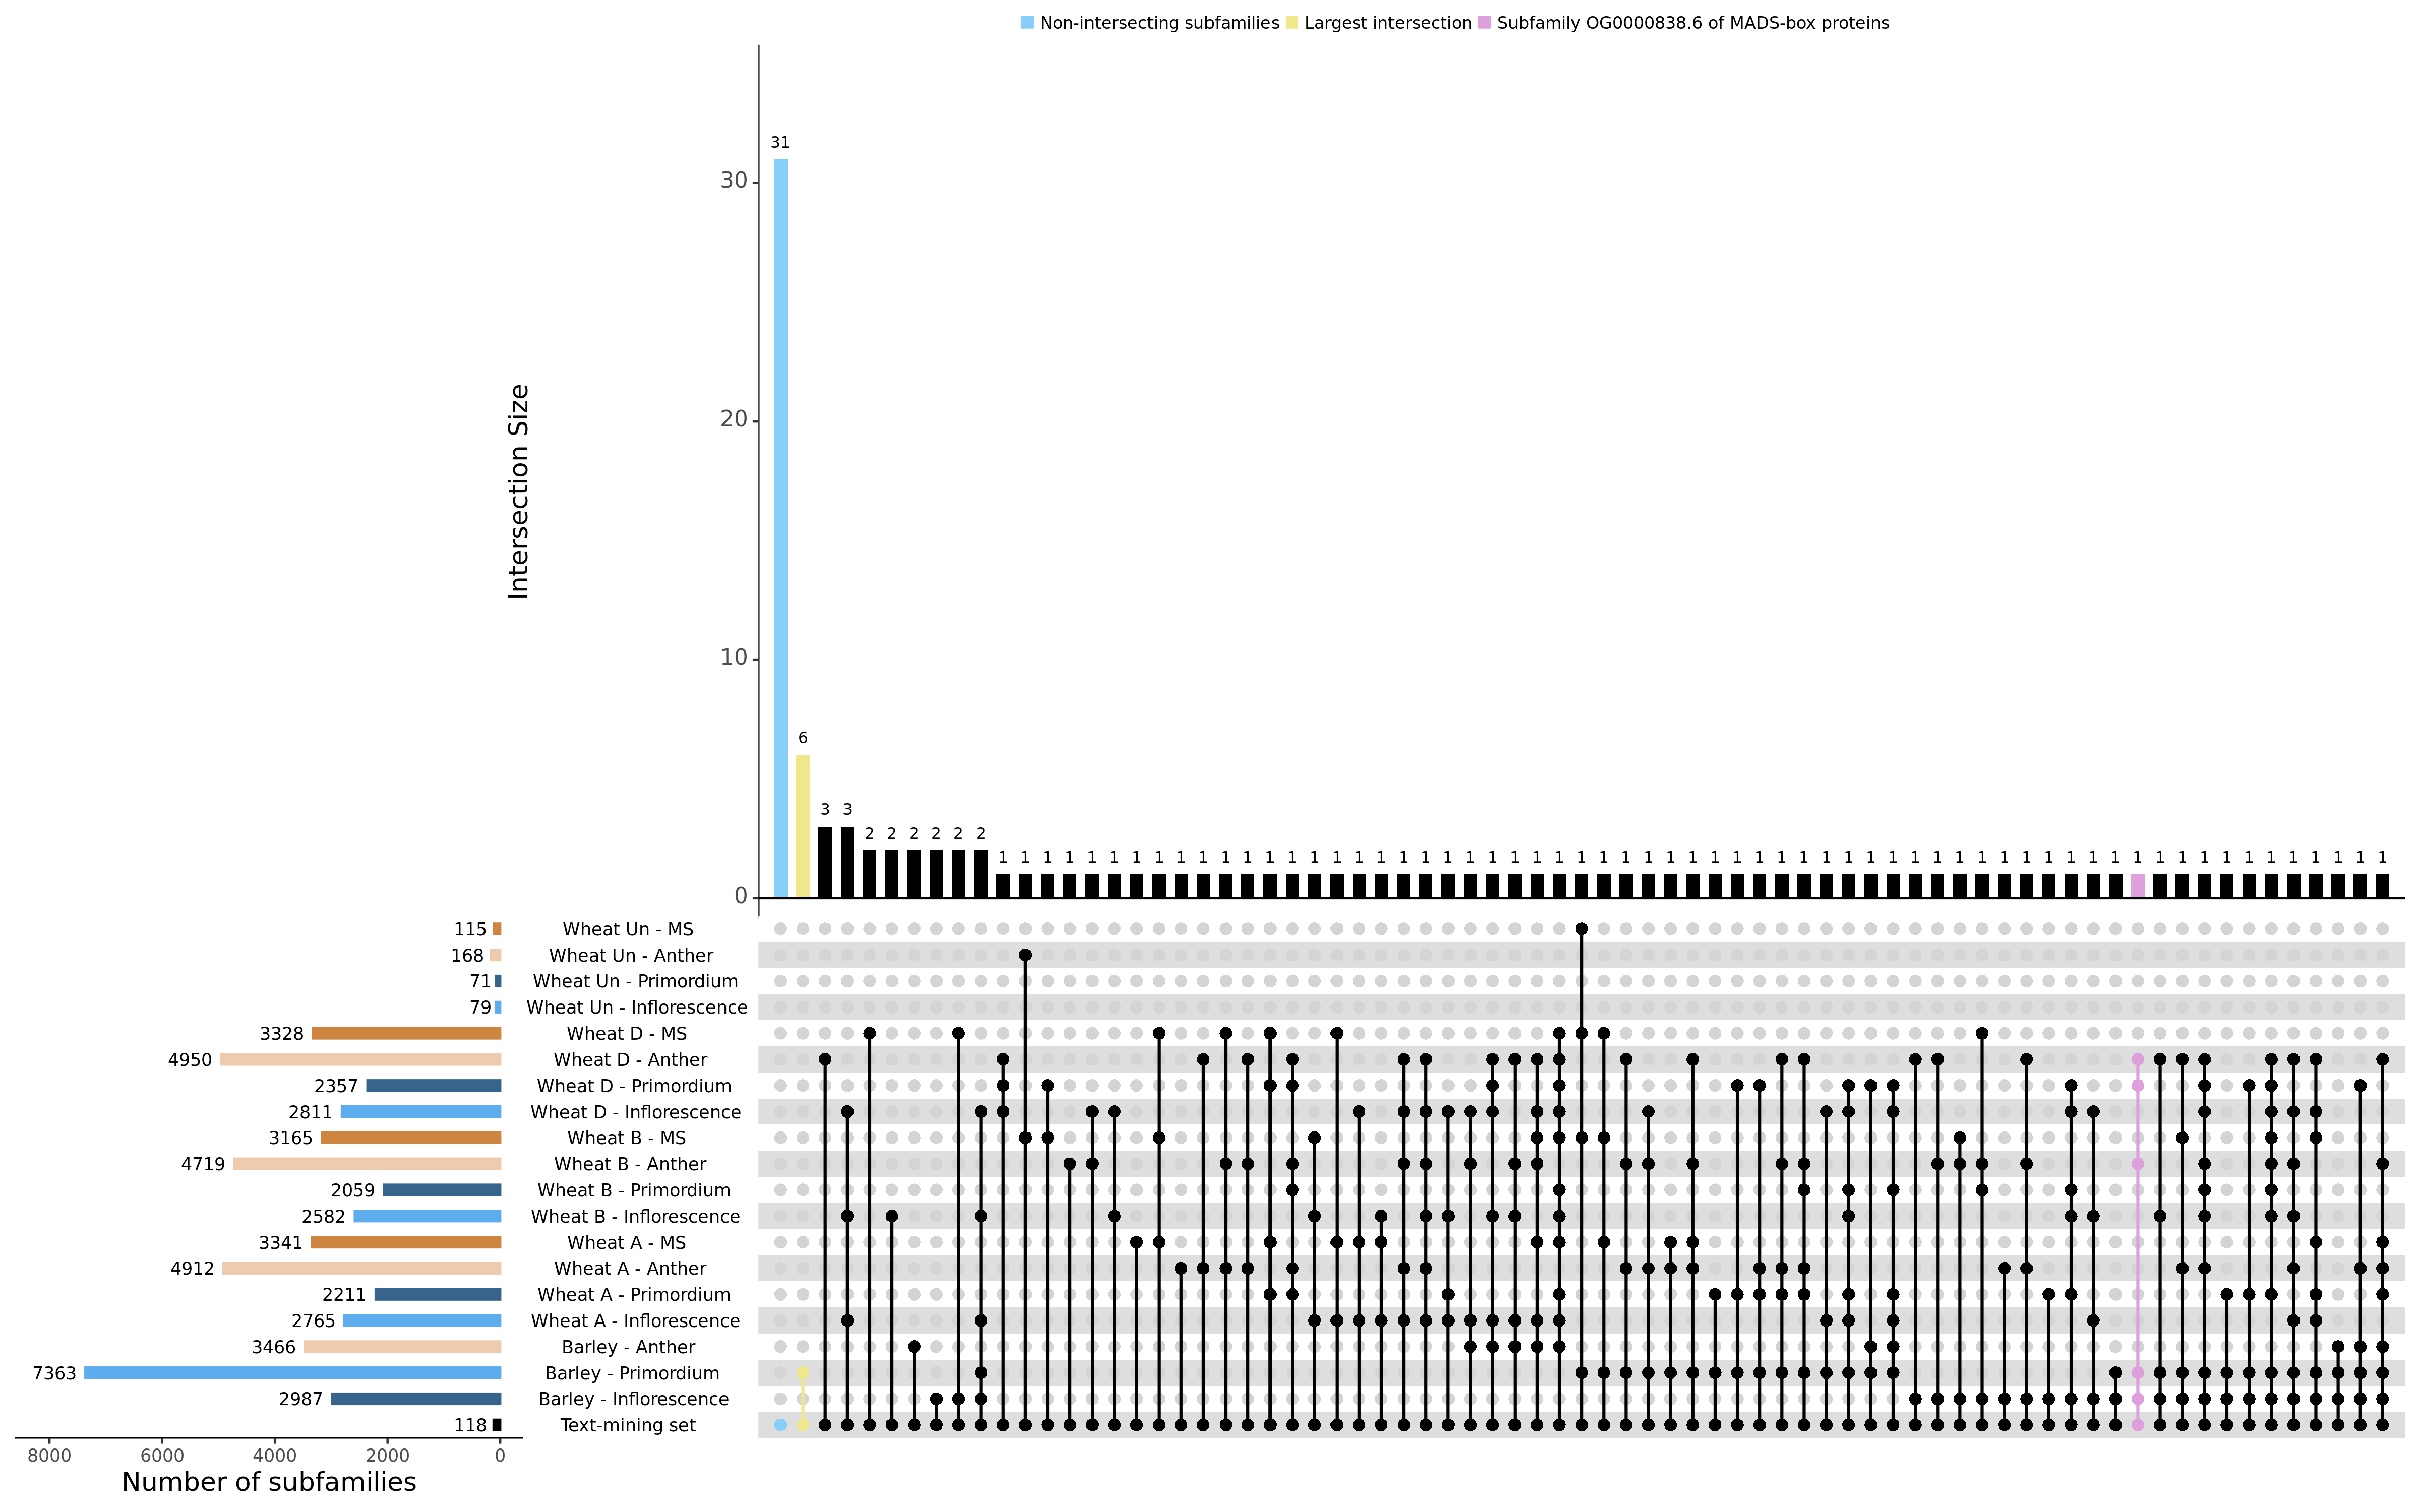

png 
  2

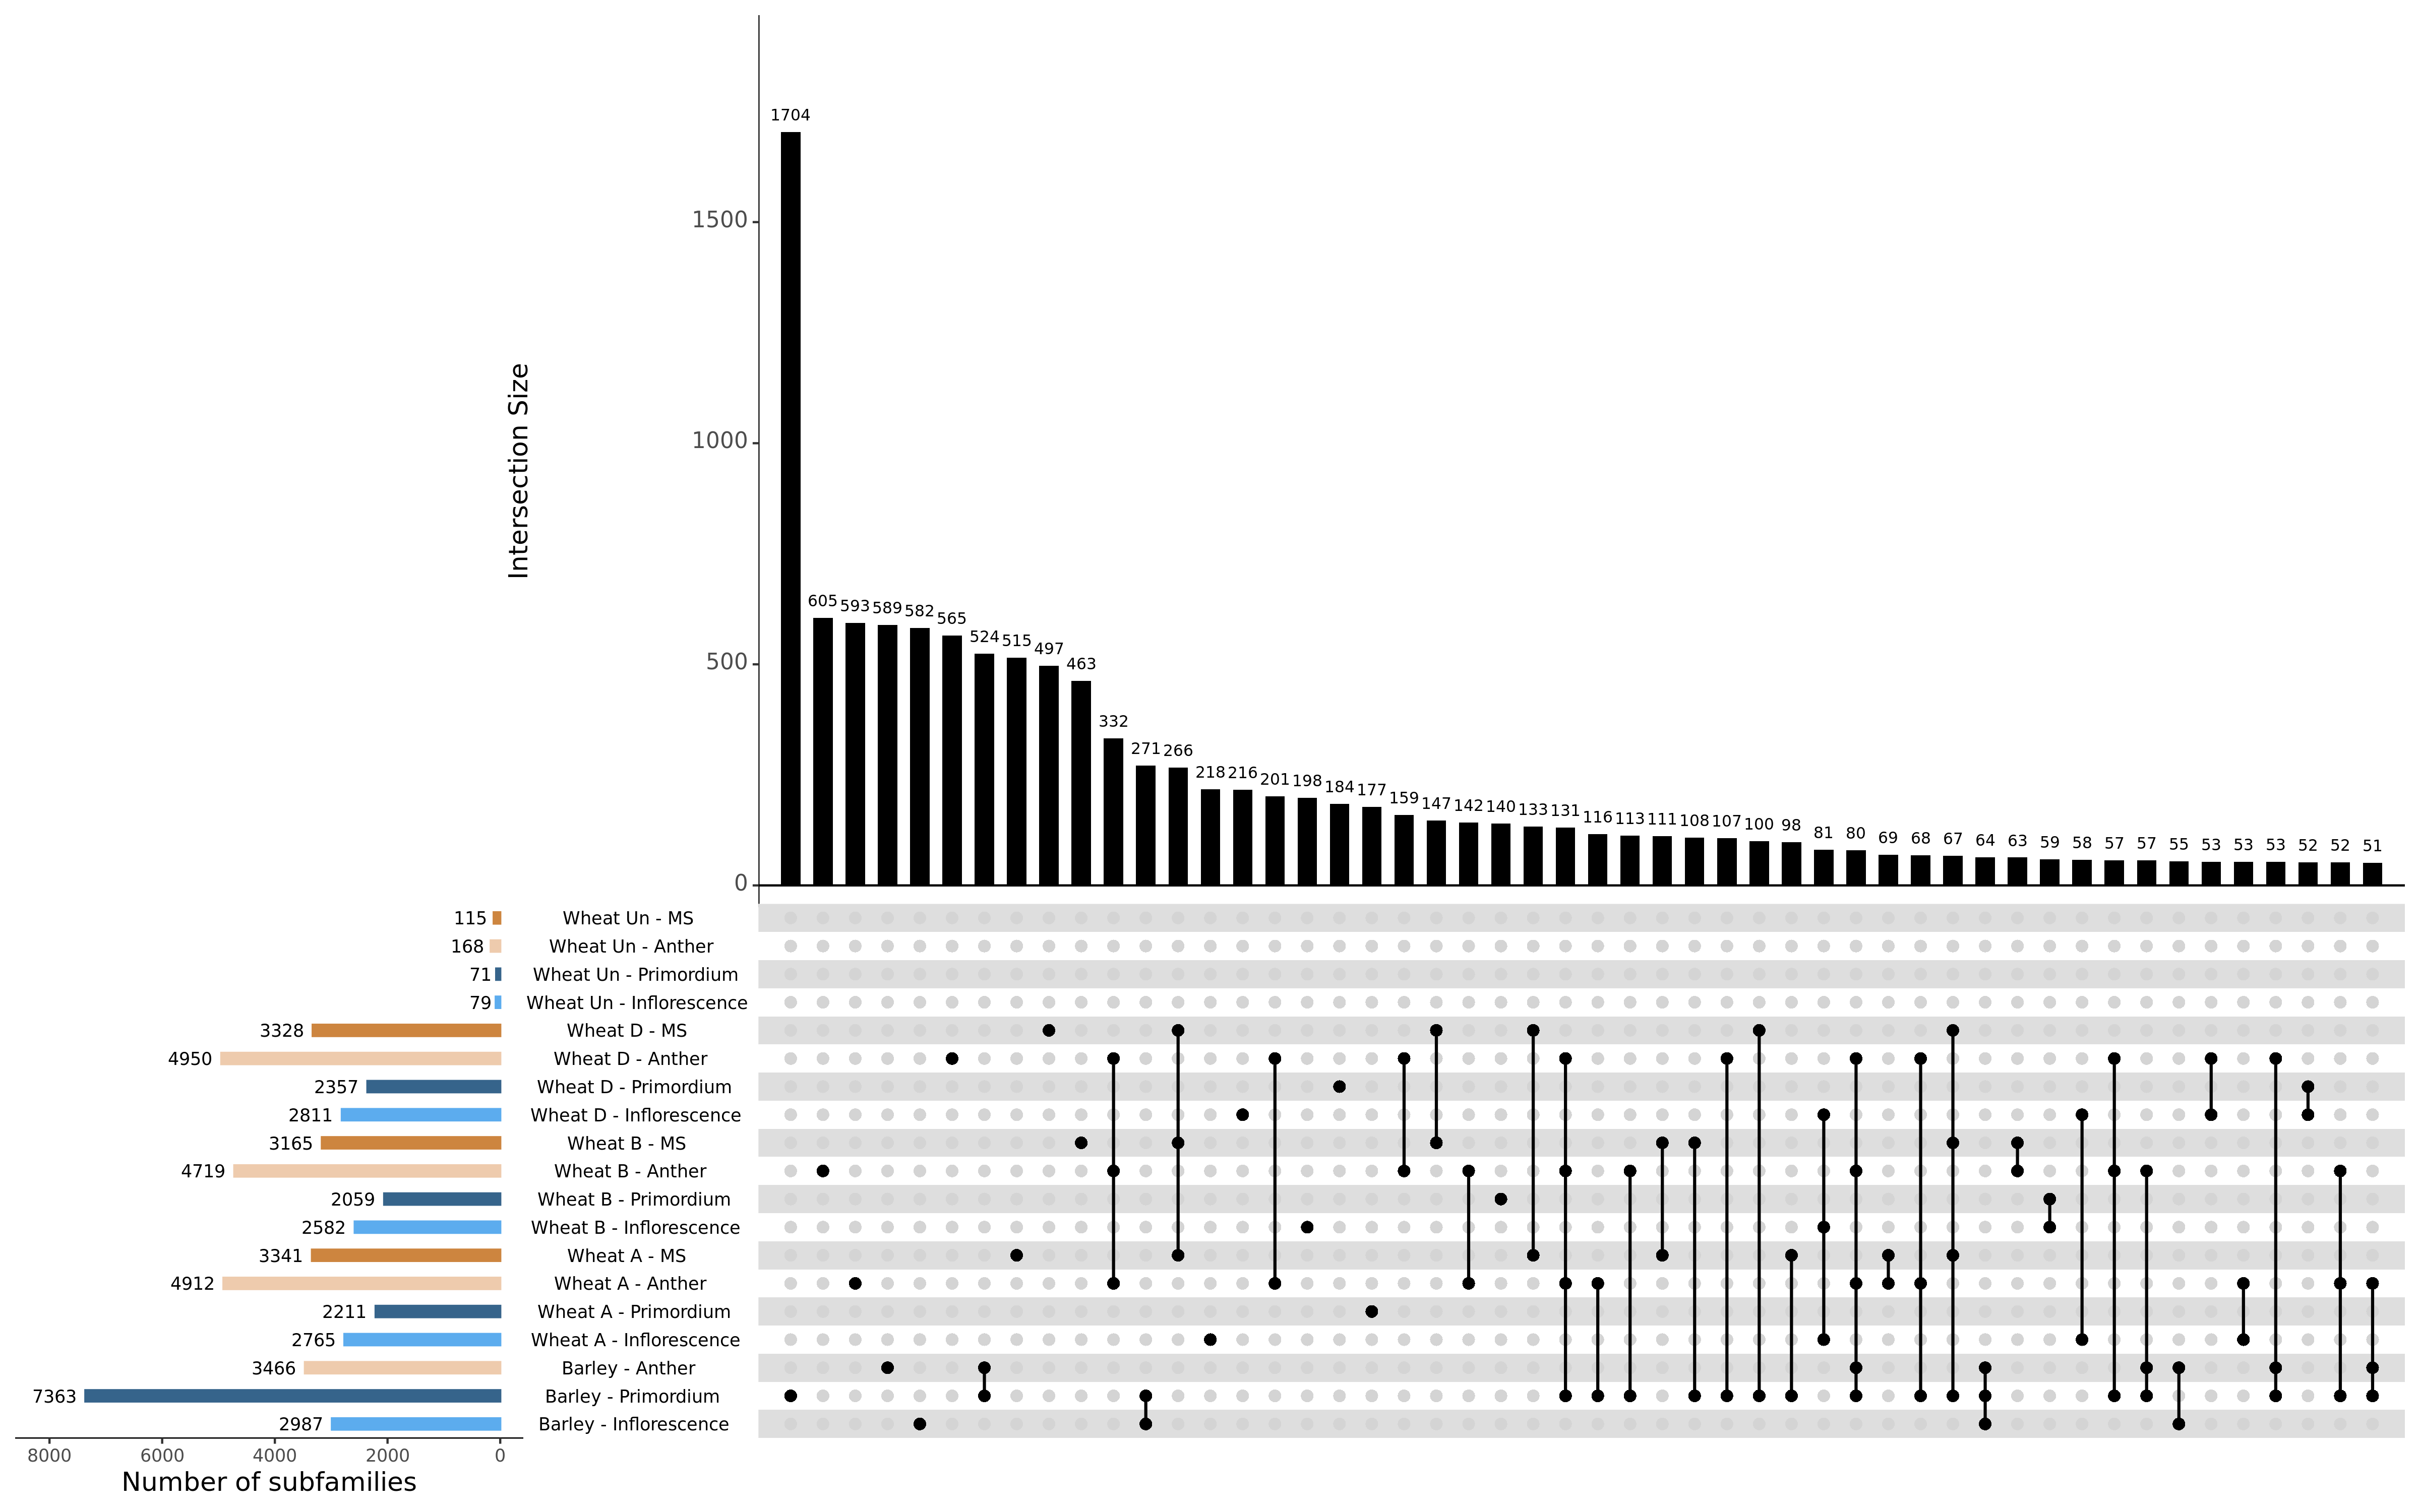

In [394]:
options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 300)

myfunction <- function(row, x) {
  newData <- (row["Subfamily"]) & (x == "OG0000838.6")
}

fam0_01_sel <- upset(u_b, sets = c("Text-mining set", "Barley - Inflorescence", "Barley - Primordium", "Barley - Anther",
                                   "Wheat A - Inflorescence", "Wheat A - Primordium", "Wheat A - Anther", "Wheat A - MS",
                                   "Wheat B - Inflorescence", "Wheat B - Primordium", "Wheat B - Anther", "Wheat B - MS",
                                   "Wheat D - Inflorescence", "Wheat D - Primordium", "Wheat D - Anther", "Wheat D - MS",
                                   "Wheat Un - Inflorescence", "Wheat Un - Primordium", "Wheat Un - Anther", "Wheat Un - MS"),
      nintersects = 200, group.by = "sets", cutoff = 200, order.by = "freq", keep.order = TRUE, main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1.5, 1.5, 1.5, 1.2, 1.2, 1.2), point.size = 2.5, set_size.scale_max = 8200, mb.ratio = c(0.6, 0.4),
      sets.bar.color = c("black", "steelblue4",  "steelblue2", "peachpuff2",   
                         "steelblue2", "steelblue4", "peachpuff2", "tan3", 
                         "steelblue2", "steelblue4", "peachpuff2", "tan3",    
                         "steelblue2", "steelblue4", "peachpuff2", "tan3",
                         "steelblue2", "steelblue4", "peachpuff2", "tan3"),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of subfamilies", query.legend = "top",
      queries = list(list(query = intersects, params = list("Text-mining set"), color = "lightskyblue", active = T, query.name = "Non-intersecting subfamilies"),
                     list(query = intersects, params = list("Text-mining set", "Barley - Primordium"), color = "khaki", active = T, query.name = "Largest intersection"),
                     list(query = intersects, params = list("Text-mining set", "Barley - Inflorescence", "Barley - Primordium", "Wheat B - Anther", "Wheat D - Primordium", "Wheat D - Anther"), 
                          color = "plum", active = T, query.name = "Subfamily OG0000838.6 of MADS-box proteins")))
                    #list(query = elements, params = list("Subfamily", NP2), color = "blue", active = T))) # b1, w7_B, w30_D, w7_D
      #queries = list(list(query = myfunction, params = list(0), active = T)))
     
                   
# add this to see intersections: nintersects = 170, group.by = "sets", cutoff = 10, 
options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 300)

fam0_01_sel2 <- upset(u_b, sets = c("Barley - Inflorescence", "Barley - Primordium", "Barley - Anther",
                                   "Wheat A - Inflorescence", "Wheat A - Primordium", "Wheat A - Anther", "Wheat A - MS",
                                   "Wheat B - Inflorescence", "Wheat B - Primordium", "Wheat B - Anther", "Wheat B - MS",
                                   "Wheat D - Inflorescence", "Wheat D - Primordium", "Wheat D - Anther", "Wheat D - MS",
                                   "Wheat Un - Inflorescence", "Wheat Un - Primordium", "Wheat Un - Anther", "Wheat Un - MS"),
      order.by = "freq", nintersects = 50, keep.order = TRUE, main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1.5, 1.5, 1.5, 1.2, 1.2, 1.2), point.size = 2.5, set_size.scale_max = 8200, mb.ratio = c(0.6, 0.4),
      sets.bar.color = c("steelblue2", "steelblue4", "peachpuff2",   
                         "steelblue2", "steelblue4", "peachpuff2", "tan3", 
                         "steelblue2", "steelblue4", "peachpuff2", "tan3",    
                         "steelblue2", "steelblue4", "peachpuff2", "tan3",
                         "steelblue2", "steelblue4", "peachpuff2", "tan3"),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of subfamilies")
      #queries = list(list(query = intersects, params = list("Barley - Primordium", "Wheat A - Anther", "Wheat B - Anther", "Wheat D - Anther"), color = "red", active = T)))
                    #list(query = elements, params = list("Subfamily", "OG0000838.6"), color = "blue", active = T)))
      #queries = list(list(query = myfunction, params = list(0), active = T))

fam0_01_sel
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
png("deg_upsetr_tm.png", units="in", width=14, height=10, res=300)
fam0_01_sel
dev.off()

fam0_01_sel2
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
png("deg_upsetr_all.png", units="in", width=16, height=10, res=300)
fam0_01_sel2
dev.off()

## 2.2 Numbers of subfamilies
"peachpuff2", "tan3"
"steelblue2", "steelblue4"

In [273]:
# barley deg tables of 0.01
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
sb1_01 <- read.table("deg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
sb1_01 <- sb1_01 %>% select (target_id) %>% rename (gene = target_id)
sb1_01 <- inner_join(sb1_01, fam_bw, by = "gene") %>% distinct(subfamily)
glimpse(sb1_01)

sb30_01 <- read.table("deg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
sb30_01 <- sb30_01 %>% select (target_id) %>% rename (gene = target_id)
sb30_01 <- inner_join(sb30_01, fam_bw, by = "gene") %>% distinct(subfamily)
glimpse(sb30_01)


sb7_01 <- read.table("deg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
sb7_01 <- sb7_01 %>% select (target_id, b) %>% rename (gene = target_id)
sb7_01 <- inner_join(sb7_01, fam_bw, by = "gene") %>% distinct(subfamily)
glimpse(sb7_01)


# wheat deg tables of 0.01
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
gw1_01 <- read.table("wdeg1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw1_01 <- gw1_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw30_01 <- read.table("wdeg30_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw30_01 <- gw30_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw7_01 <- read.table("wdeg7_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw7_01 <- gw7_01 %>% select (target_id, b) %>% rename (gene = target_id)
gw10_01 <- read.table("wdeg10_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
gw10_01 <- gw10_01 %>% select (target_id, b) %>% rename (gene = target_id)

# intersect wheat tables with subfam table to get subgenome ratios of genes
# A
fgw1_01 <- inner_join(fam_wA, gw1_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw1_01)

fgw30_01 <- inner_join(fam_wA, gw30_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw30_01)

fgw7_01 <- inner_join(fam_wA, gw7_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw7_01)

fgw10_01 <- inner_join(fam_wA, gw10_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw10_01)

# B
fgw1_01 <- inner_join(fam_wB, gw1_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw1_01)

fgw30_01 <- inner_join(fam_wB, gw30_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw30_01)

fgw7_01 <- inner_join(fam_wB, gw7_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw7_01)

fgw10_01 <- inner_join(fam_wB, gw10_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw10_01)

# D
fgw1_01 <- inner_join(fam_wD, gw1_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw1_01)

fgw30_01 <- inner_join(fam_wD, gw30_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw30_01)

fgw7_01 <- inner_join(fam_wD, gw7_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw7_01)

fgw10_01 <- inner_join(fam_wD, gw10_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw10_01)

# Un
fgw1_01 <- inner_join(fam_wU, gw1_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw1_01)

fgw30_01 <- inner_join(fam_wU, gw30_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw30_01)

fgw7_01 <- inner_join(fam_wU, gw7_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw7_01)

fgw10_01 <- inner_join(fam_wU, gw10_01, by = "gene") %>% distinct(subfamily)
glimpse(fgw10_01)

Rows: 2,987
Columns: 1
$ subfamily <chr> "OG0003495.1", "OG0000298.2", "OG0009749.1", "OG0000164.1",…
Rows: 7,363
Columns: 1
$ subfamily <chr> "OG0003495.1", "OG0001813.1", "OG0000170.1", "OG0000543.7",…
Rows: 3,466
Columns: 1
$ subfamily <chr> "OG0003495.1", "OG0009065.1", "OG0005264.1", "OG0003316.1",…
Rows: 2,765
Columns: 1
$ subfamily <chr> "OG0000010.17", "OG0000014.11", "OG0000014.20", "OG0000020.…
Rows: 2,211
Columns: 1
$ subfamily <chr> "OG0000024.3", "OG0000030.19", "OG0000032.19", "OG0000040.1…
Rows: 4,912
Columns: 1
$ subfamily <chr> "OG0000020.10", "OG0000020.14", "OG0000020.19", "OG0000020.…
Rows: 3,341
Columns: 1
$ subfamily <chr> "OG0000010.32", "OG0000010.40", "OG0000020.6", "OG0000023.1…
Rows: 2,582
Columns: 1
$ subfamily <chr> "OG0000014.11", "OG0000014.20", "OG0000020.3", "OG0000023.2…
Rows: 2,059
Columns: 1
$ subfamily <chr> "OG0000010.11", "OG0000014.20", "OG0000020.3", "OG0000020.3…
Rows: 4,719
Columns: 1
$ subfamily <chr> "OG0000010.1", "OG0000010.18", "OG0000010

In [274]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/vanda.marosi/anaconda3/envs/r/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RVenn_1.1.0     UpSetR_1.4.0    forcats_0.5.0   stringr_1.4.0  
 [5] dplyr_0.8.5     purrr_0.3.4     readr_1.3.1     tidyr_1.0.2    
 [9] tibble_3.0.1    ggplot2_3.3.0   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3     tidyselect_1.0.0 repr_1.1.0       haven_